# FINAL PROJECT - Introduction to Data Science
# Project 01 - House Price Prediction - 22KDL
# Group_17 - **Methodology**
# Performed by: Vĩnh Thuận, Nhựt Trường, Từ Thức

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # Sử dụng thư viện seaborn để thực hiện các trực quan hóa dữ liệu
import re
import pickle

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Sử dụng Pandas để nhập tệp CSV vào một dataframe
data = pd.read_csv('https://raw.githubusercontent.com/ThuanLy-0092/HousePrice_Prediction_Project/main/clean_data.csv')
data

,Price,Acreage,Amenities_rating,Floors,days_since_min,Rooms,Distance_to_center
0,5.80,55,6.0,4,391,7,4.765578
1,4.97,43,2.7,3,391,12,6.924790
2,12.50,55,4.8,4,391,6,9.568381
3,4.00,40,3.0,3,391,7,7.621127
4,1.85,14,1.5,3,391,5,4.267616
...,...,...,...,...,...,...,...
4628,5.99,109,6.0,2,77,6,10.240432
4629,3.00,83,6.0,1,70,2,3.135531
4630,5.20,40,4.8,3,73,6,5.403038
4631,7.00,40,3.3,4,76,6,4.068007


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4633 non-null   float64
 1   Acreage             4633 non-null   int64  
 2   Amenities_rating    4633 non-null   float64
 3   Floors              4633 non-null   int64  
 4   days_since_min      4633 non-null   int64  
 5   Rooms               4633 non-null   int64  
 6   Distance_to_center  4633 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 253.5 KB


In [ ]:
data.describe()

,Price,Acreage,Amenities_rating,Floors,days_since_min,Rooms,Distance_to_center
count,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000
mean,5.757023,58.165120,3.989553,2.495359,235.169868,6.359378,22.137518
std,2.635153,21.567766,1.495279,0.865545,128.159106,2.404597,144.338302
min,0.105000,8.000000,0.000000,1.000000,0.000000,2.000000,0.473467
25%,4.000000,44.000000,3.000000,2.000000,108.000000,4.000000,4.064113
50%,5.500000,55.000000,4.500000,2.000000,226.000000,6.000000,6.924790
75%,7.000000,70.000000,4.800000,3.000000,357.000000,8.000000,9.384954
max,14.000000,126.000000,6.000000,4.000000,460.000000,14.000000,3617.122274


# Methodology

## Design a methodology

### Ridge regression

- ***`Regularization`:*** Sử dụng norm L2 của vector hệ số để giảm thiểu hàm mục tiêu. Thành phần regularization này giúp kiểm soát độ lớn của các hệ số của biến đầu vào, làm giảm sự biến động của mô hình và giảm thiểu overfitting.

- ***Giảm thiểu overfitting:*** Đặc điểm chính của Ridge Regression là giảm thiểu overfitting bằng cách giới hạn độ lớn của các hệ số. Điều này làm giảm khả năng mô hình học được nhiễu từ dữ liệu huấn luyện và cải thiện khả năng tổng quát hóa của mô hình trên dữ liệu mới.

- ***Phương trình hồi quy có dạng chuẩn:*** Ridge Regression giải quyết vấn đề của phương trình hồi quy bị không ổn định (ill-conditioned) bằng cách thêm vào một phần tử đường chéo trong ma trận hệ số. Điều này đảm bảo rằng phương trình hồi quy luôn có nghiệm duy nhất.

#### Đặc điểm chính của Ridge regression

- ***Khả năng xử lý đa cộng tuyến:*** Ridge Regression có thể xử lý tốt các vấn đề liên quan đến đa cộng tuyến, khi có sự tương quan cao giữa các biến đầu vào.

- ***Cân bằng giữa độ lớn của hệ số và lỗi dự đoán:*** Tham số alpha (λ) trong Ridge Regression điều chỉnh mức độ của regularization. Giá trị của alpha càng cao thì độ lớn của các hệ số càng giảm, và ngược lại.

- ***Yêu cầu các biến đầu vào được chuẩn hóa:*** Ridge Regression yêu cầu các biến đầu vào được chuẩn hóa để các hệ số có thể so sánh được với nhau. Việc này đảm bảo rằng mỗi biến đầu vào có cùng mức độ ảnh hưởng đến kết quả dự đoán.

#### Tính phù hợp với bài toán dự đoán giá nhà
- ***Giảm thiểu overfitting:*** Bài toán dự đoán giá nhà thường có rất nhiều biến đầu vào (như diện tích, vị trí, số phòng ngủ, tiện ích xung quanh, ...) và có thể dễ dàng bị overfitting nếu không kiểm soát được độ phức tạp của mô hình. Ridge Regression giúp giảm thiểu overfitting bằng cách giới hạn độ lớn của các hệ số, từ đó cải thiện khả năng tổng quát hóa của mô hình trên dữ liệu mới.

- ***Yêu cầu chuẩn hóa biến đầu vào:*** Ridge Regression yêu cầu các biến đầu vào được chuẩn hóa để các hệ số có thể so sánh được với nhau. Điều này phù hợp với bài toán dự đoán giá nhà, vì các biến đầu vào như diện tích, giá trị nhà đều có thang đo tương đối lớn và cần được chuẩn hóa để đảm bảo tính công bằng giữa các biến.

- ***Cân bằng giữa tốc độ học và hiệu suất dự đoán:*** Tham số alpha trong Ridge Regression điều chỉnh mức độ của regularization. Việc lựa chọn alpha phù hợp sẽ giúp cân bằng giữa tốc độ học của mô hình và khả năng cải thiện dự đoán. Điều này rất quan trọng trong bài toán dự đoán giá nhà, khi mô hình cần phải có khả năng dự đoán chính xác và đồng thời tránh overfitting.

#### Siêu tham số `ridge__alpha`
- `alpha` là siêu tham số trong Ridge Regression quy định mức độ của regularization. Nó quyết định độ lớn của hệ số chuẩn hoá L2 được thêm vào hàm mục tiêu.
- Giá trị của `alpha` được chọn càng cao, mô hình sẽ càng được kiểm soát một cách nghiêm ngặt hơn, dẫn đến các hệ số hồi quy (coefficients) của mô hình có xu hướng giảm xuống gần với 0. Điều này có thể giảm thiểu overfitting nhưng cũng có thể làm giảm hiệu suất của mô hình nếu mức độ regularization quá cao.
- Ngược lại, nếu `alpha` quá thấp, mô hình sẽ ít bị kiểm soát và có thể dẫn đến overfitting trên tập huấn luyện.


#### Khoảng giá trị tối ưu cho alpha
- ***Số lượng biến đầu vào và sự tương quan:*** Nếu có nhiều biến đầu vào và các biến này có mức độ tương quan cao, có thể cần đến các giá trị alpha lớn để giảm thiểu overfitting.

- ***Sự phân tán của dữ liệu:*** Nếu dữ liệu có sự phân tán lớn, đôi khi cần đến các giá trị alpha lớn hơn để mô hình không bị ảnh hưởng quá mức bởi các điểm dữ liệu nhiễu.

- ***Mục tiêu của mô hình:*** Nếu mục tiêu là có một mô hình đơn giản và dự đoán ổn định, có thể cần đến các giá trị alpha lớn hơn để kiểm soát mức độ phức tạp của mô hình.

- ###   [ 0.00015, 0.0015, 0.015, 0.15, 1, 10, 100 ]
- `0.00015, 0.0015, 0.015:` Một giá trị nhỏ để kiểm tra mức độ regularization yếu.
- `0.15, 1:` Các giá trị vừa phải, phù hợp cho hầu hết các trường hợp và dữ liệu.
- `10, 100:` Các giá trị lớn hơn, dùng để kiểm tra mức độ regularization mạnh hơn.

 ***Khoảng giá trị trên là một lựa chọn phổ biến và có thể áp dụng rộng rãi cho nhiều trường hợp. Tuy nhiên, để xác định chính xác khoảng giá trị tối ưu cho alpha, bạn nên thử nghiệm và đánh giá kết quả trên các mô hình huấn luyện để chọn ra giá trị alpha tốt nhất cho từng trường hợp cụ thể.***

###Ridge Regression- with polynomial

- Các đặc điểm tương tự với Ridge regression

- Ridge Regression sử dụng các biến đa thức của các biến gốc để mở rộng không gian đặc trưng của mô hình. Ví dụ, nếu ban đầu có một biến x, thì các biến đa thức bậc hai sẽ là x^2, x^3 , và các bậc cao hơn.

- Việc thêm các biến đa thức giúp mô hình có thể biểu diễn được các mối quan hệ phi tuyến giữa các biến đầu vào và biến mục tiêu một cách chính xác hơn.

- ***Tối ưu hóa:*** Mục tiêu của Ridge Regression là tối thiểu hóa hàm mất mát, bao gồm cả thành phần lỗi và thành phần regularization. Một phần của hàm mất mát sẽ bao gồm các hạng tử để đảm bảo rằng mô hình được tối ưu hóa sao cho dự đoán chính xác trên dữ liệu huấn luyện và tổng quát hóa tốt trên dữ liệu mới.

- ***Lựa chọn mức độ đa thức:*** Việc lựa chọn mức độ của đa thức (số lượng biến đa thức) là quan trọng để đạt được sự cân bằng giữa underfitting và overfitting. Mức độ cao hơn của đa thức có thể dẫn đến overfitting, trong khi mức độ thấp hơn có thể dẫn đến underfitting. Điều này yêu cầu sự điều chỉnh và kiểm soát cẩn thận để đạt được một mô hình có hiệu suất tốt trên dữ liệu thực tế.

- ***Phù hợp với bài toán:*** Mô hình Ridge Regression sử dụng đặc trưng đa thức phù hợp với các bài toán mà dữ liệu có nhiều biến đầu vào và có mối quan hệ phức tạp giữa các biến này và biến mục tiêu. Đặc biệt là trong các bài toán dự đoán giá nhà, khi các yếu tố như diện tích, vị trí, tiện ích xung quanh có thể ảnh hưởng không chỉ tuyến tính mà còn phi tuyến tính đến giá nhà.

#### Siêu tham số `poly__degree` & `ridge__alpha`
- ***Khi `poly__degree = 1`:*** Không có đặc trưng đa thức nào được thêm vào, chỉ có các biến gốc được sử dụng để dự đoán.
- ***Khi `poly__degree > 1`:*** Chúng ta sẽ tạo ra các đặc trưng mới từ các biến gốc bằng cách thêm các đa thức của chúng, ví dụ như bình phương (x^2), lập phương (x^3), v.v. Các đặc trưng này có thể giúp mô hình học được mối quan hệ phi tuyến giữa các biến đầu vào và biến mục tiêu.

- ***Khi `ridge__alpha càng lớn`:*** Mức độ regularization càng cao, các hệ số của mô hình sẽ được giảm giá trị để tránh mô hình quá phức tạp.
- ***Khi `ridge__alpha càng nhỏ`:*** Mô hình sẽ có xu hướng tối ưu hóa độ chính xác trên tập huấn luyện, nhưng có nguy cơ overfitting.

#### Khoảng giá trị tối ưu cho mô hình
- `poly__degree`: Thường nên bắt đầu với các giá trị nhỏ và tăng dần để xem mức độ cải thiện của mô hình. Thông thường, các giá trị từ 1 đến 3 thường là lựa chọn phổ biến. Các bậc cao hơn có thể được sử dụng nếu có sự phụ thuộc phi tuyến mạnh giữa biến đầu vào và biến mục tiêu.
- ### ***poly__degree***: [1, 2, 3, 4, 5]


- `ridge__alpha`: Cần thử nghiệm các giá trị khác nhau trong một khoảng đa dạng từ rất nhỏ đến lớn. Các giá trị thường được lựa chọn là từ 0.001 đến 1000. Việc chọn ridge__alpha cũng phụ thuộc vào tỷ lệ của biến đầu vào, và sự phân loại của dữ liệu.

- ### ***ridge__alpha***: [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100, 1000, 10000]




- ***Kiểm tra hiệu suất mô hình:***
Sau khi huấn luyện mô hình với các tham số này, bạn nên đánh giá hiệu suất của mô hình trên tập kiểm tra bằng các chỉ số như Mean Squared Error (MSE), Mean Absolute Error (MAE), và R-squared (R2). Những chỉ số này sẽ giúp bạn biết được mức độ chính xác và khả năng tổng quát hóa của mô hình.


- ***Điều chỉnh và tối ưu hóa:***
Nếu hiệu suất của mô hình chưa đạt yêu cầu, bạn có thể cân nhắc thử các giá trị poly__degree lớn hơn (như 6, 7) hoặc tăng dần từng bước để xem sự thay đổi. Đối với ridge__alpha, bạn có thể thử các giá trị nằm giữa các khoảng giá trị đã chọn (ví dụ: 0.001, 0.01, 0.1, 1, 100, 1000) để kiểm tra sự ảnh hưởng của từng giá trị.

### Random Forest

- ***`Ensemble Learning`:*** Random Forest là một phương pháp trong họ Ensemble Learning, nơi nó xây dựng nhiều cây quyết định độc lập và kết hợp chúng để cải thiện dự đoán.
- ***`Các cây quyết định (Decision Trees)`:*** Mỗi cây quyết định trong Random Forest được xây dựng độc lập dựa trên một phần của dữ liệu huấn luyện và một số đặc trưng ngẫu nhiên.
- ***`Bootstrap và Bagging`:*** Random Forest sử dụng phương pháp Bootstrap để lấy mẫu dữ liệu cho mỗi cây quyết định, và kết hợp phương pháp Bagging để giảm phương sai (variance) của mô hình.
- ***`Tính ngẫu nhiên`:*** Đặc điểm quan trọng của Random Forest là sự ngẫu nhiên trong việc lựa chọn các đặc trưng và mẫu dữ liệu cho mỗi cây quyết định, giúp giảm thiểu overfitting và cải thiện khả năng tổng quát hóa của mô hình.

#### Đặc điểm chính của Random Forest
-  ***Khả năng xử lý dữ liệu lớn và đa đặc trưng:*** RF phù hợp với các bài toán dự đoán trên dữ liệu có nhiều đặc trưng và có khả năng xử lý các mối quan hệ phức tạp giữa các đặc trưng và biến mục tiêu.
- ***Xử lý biến số không tuyến tính:*** Với khả năng xử lý các mối quan hệ không tuyến tính, Random Forest có thể hiệu quả trong việc dự đoán các biến số phức tạp như giá nhà.
- ***Ổn định và dễ sử dụng:*** RF là một phương pháp ổn định và dễ sử dụng, không yêu cầu nhiều siêu tham số (hyperparameters) điều chỉnh so với các phương pháp khác như SVM hay Neural Networks.

#### Tính phù hợp với bài toán dự đoán giá nhà:
- ***Dữ liệu có nhiều đặc trưng:*** Bài toán dự đoán giá nhà thường có rất nhiều đặc trưng như diện tích, vị trí, tiện ích xung quanh, loại hình nhà đất, năm xây dựng, và nhiều yếu tố khác. RF có thể xử lý hiệu quả các bộ dữ liệu phức tạp với nhiều đặc trưng này.

- ***Mối quan hệ không tuyến tính:*** Giá nhà thường phụ thuộc vào các yếu tố không tuyến tính và tương tác phức tạp giữa các đặc trưng. RF có khả năng mô hình hóa các mối quan hệ này một cách linh hoạt và hiệu quả.

- ***Ổn định và chính xác:*** Nhờ vào sự kết hợp của nhiều cây quyết định độc lập và kỹ thuật ngẫu nhiên, RF thường cho kết quả dự đoán ổn định và có độ chính xác cao, giúp các nhà phân tích dự đoán giá nhà một cách chính xác và đáng tin cậy.

#### Siêu tham số của Random Forest Regressor
`n_estimators:`

- ***Ý nghĩa:*** Số lượng cây trong rừng ngẫu nhiên.
- ***Khoảng giá trị tối ưu:***
Thông thường, các giá trị từ 100 đến 500 là đủ cho hầu hết các ứng dụng. Tuy nhiên, số lượng cây lớn hơn có thể cải thiện hiệu suất nhưng cũng tăng thời gian tính toán.
- **`n_estimators:` [100, 200, 300]** là một khoảng giá trị hợp lý để bắt đầu, nhưng có thể mở rộng tới 500 hoặc 1000 nếu mô hình vẫn có thể cải thiện hiệu suất với nhiều cây hơn.


`max_depth:`

- ***Ý nghĩa:*** Độ sâu tối đa của mỗi cây quyết định số lượng các quyết định (decision points) trong một cây.
- ***Khoảng giá trị tối ưu:***
Giá trị None có nghĩa là các cây sẽ phát triển cho đến khi tất cả các lá chứa ít nhất min_samples_split mẫu.
Các giá trị phổ biến là từ 10 đến 30. Trong một số trường hợp, giá trị None có thể dẫn đến overfitting.
- **`max_depth:` [None, 10, 20, 30]** là một khoảng giá trị tốt để thử nghiệm.


`min_samples_split:`

- ***Ý nghĩa:*** Số lượng mẫu tối thiểu cần thiết để chia một nút.
- ***Khoảng giá trị tối ưu:***
Các giá trị phổ biến từ 2 đến 10.
- **`min_samples_split:` [2, 5, 10]** là một khoảng giá trị hợp lý để kiểm tra.
Giá trị nhỏ có thể dẫn đến overfitting, trong khi giá trị lớn có thể dẫn đến underfitting.


`min_samples_leaf:`

- ***Ý nghĩa:*** Số lượng mẫu tối thiểu trên mỗi lá.
- ***Khoảng giá trị tối ưu:***
Các giá trị phổ biến từ 1 đến 5.
- **`min_samples_leaf:` [1, 2, 4]** là một khoảng giá trị hợp lý để thử nghiệm.
Giá trị nhỏ có thể dẫn đến overfitting, giá trị lớn có thể dẫn đến underfitting.

`max_features:`

- ***Ý nghĩa:*** Số lượng features tối đa cần thiết để cân nhắc khi tìm split point.
- ***Khoảng giá trị tối ưu:***
Các giá trị phổ biến là auto (sử dụng tất cả các features), sqrt (căn bậc hai của tổng số features) và log2 (log cơ số 2 của tổng số features).
- **`max_features:` ['auto', 'sqrt', 'log2']** là các giá trị hợp lý để thử nghiệm.

#### Lưu ý:
- **Overfitting:** Điều chỉnh các siêu tham số như max_depth, min_samples_split, và min_samples_leaf để tránh overfitting.
- **Thời gian huấn luyện:** Số lượng cây (n_estimators) càng lớn thì thời gian huấn luyện càng lâu. Cân nhắc giữa hiệu suất và thời gian huấn luyện.
- **Cross-validation:** Sử dụng cross-validation để kiểm tra hiệu suất của các siêu tham số và chọn giá trị tối ưu.

### XGboosting là một biến thể được cải tiến của Gradient Boosting


- ***`XGBoosting`***: XGB là một phương pháp thuộc họ `Boosting` (Mục tiêu là giảm bias - áp dụng cho các model có variance thấp và bị bias cao).
 Boosting sẽ tạo ra một loạt các model yếu, học bổ sung lẫn nhau. Nói cách khác, trong Boosting, các model sau sẽ cố gắng học để hạn chế lỗi lầm của các model trước.

- ***Cải tiến từ `Gradient Boosting`***: XGBoost cải tiến từ Gradient Boosting bằng cách áp dụng nhiều kỹ thuật như regularization để giảm overfitting, hỗ trợ tính toán song song để tăng tốc độ huấn luyện, và cải thiện xử lý dữ liệu thưa (sparse data).

- ***Thuật toán `cây quyết định(Decision Tree)`***: Tương tự như Gradient Boosting, XGBoost sử dụng các cây quyết định nhỏ để xây dựng mô hình. Mỗi cây quyết định được điều chỉnh để cải thiện dự đoán một cách hiệu quả hơn.

- ***`Learning rate`***: XGBoost sử dụng tham số shrinkage (learning rate) để điều chỉnh tốc độ học của mỗi cây. Tham số này giúp cân bằng giữa tốc độ học và việc cải thiện dự đoán.


#### Đặc điểm chính của Gradient Boosting:
- ***Xử lý lỗi (Residuals):*** Mỗi cây quyết định trong mô hình Gradient Boosting được xây dựng để dự đoán phần dư (residuals) của dự đoán từ mô hình trước đó.

- ***Tích hợp nhiều mô hình nhỏ:*** Gradient Boosting kết hợp nhiều mô hình nhỏ (cây quyết định) để tạo ra một mô hình tổng hợp mạnh mẽ.

- ***Điều chỉnh tốc độ học:*** Sử dụng tham số shrinkage (learning rate) để điều chỉnh mức độ mà mỗi cây mới cải thiện dự đoán.

#### Tính phù hợp với bài toán dự đoán giá nhà:
- ***Phù hợp với dữ liệu có nhiều đặc trưng:*** Gradient Boosting có khả năng xử lý tốt dữ liệu có nhiều đặc trưng và mối quan hệ phức tạp giữa các đặc trưng và mục tiêu.

- ***Xử lý biến số không tuyến tính:*** Giá nhà thường bị ảnh hưởng bởi nhiều yếu tố không tuyến tính, và Gradient Boosting có khả năng xử lý các mối quan hệ phức tạp này.

- ***Khả năng khắc phục lỗi:*** Bằng cách dự đoán phần dư và cải thiện dần dần, Gradient Boosting có thể giảm thiểu lỗi dự đoán một cách hiệu quả.


#### Siêu tham số trong XGBoosting
`learning_rate:`

- **Ý nghĩa**: Tốc độ học của mô hình. Giá trị nhỏ hơn làm giảm tốc độ học nhưng có thể dẫn đến mô hình tốt hơn bằng cách giảm thiểu overfitting.
- **Khoảng giá trị tối ưu:** Thông thường nằm trong khoảng từ 0.01 đến 0.2. Các giá trị lớn hơn có thể dẫn đến overfitting.
- `learning_rate`: [0.01, 0.05, 0.1, 0.2]

`max_depth:`

- **Ý nghĩa:** Độ sâu tối đa của mỗi cây trong mô hình. Độ sâu lớn hơn cho phép mô hình học được nhiều thông tin hơn từ dữ liệu nhưng cũng tăng nguy cơ overfitting.
- **Khoảng giá trị tối ưu:** Thông thường từ 3 đến 10. Giá trị nhỏ hơn có thể dẫn đến underfitting, giá trị lớn hơn có thể dẫn đến overfitting.
- `max_depth`: [3, 4, 5, 6,7,8,9,10]

`n_estimators:`

- **Ý nghĩa:** Số lượng cây trong mô hình. Số lượng cây lớn hơn có thể cải thiện hiệu suất nhưng cũng tăng thời gian tính toán.
- **Khoảng giá trị tối ưu:** Thông thường từ 100 đến 400. Giá trị lớn hơn có thể cải thiện hiệu suất nhưng cũng tăng thời gian huấn luyện và nguy cơ overfitting.
- `n_estimators`: [100, 200, 300, 400]

`subsample:`

- **Ý nghĩa:** Tỷ lệ mẫu được sử dụng để huấn luyện mỗi cây. Giá trị nhỏ hơn 1.0 giúp giảm overfitting.
- **Khoảng giá trị tối ưu:** Thông thường từ 0.6 đến 1.0. Giá trị thấp hơn có thể giúp mô hình tổng quát hóa tốt hơn nhưng cũng có thể dẫn đến underfitting nếu quá thấp.
- `subsample`: [0.6, 0.7, 0.8, 0.9, 1.0]

`colsample_bytree:`

- **Ý nghĩa:** Tỷ lệ các features được sử dụng để huấn luyện mỗi cây. Giá trị nhỏ hơn 1.0 giúp giảm overfitting.
- **Khoảng giá trị tối ưu:** Thông thường từ 0.6 đến 1.0. Giá trị thấp hơn có thể giúp mô hình tổng quát hóa tốt hơn nhưng cũng có thể dẫn đến underfitting nếu quá thấp.
- `colsample_bytree`: [0.6, 0.7, 0.8, 0.9, 1.0]

### References

* [Python sklearn model selection documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Python sklearn GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Python sklearn RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
* [Python sklearn StratifiedKFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
* [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
* [Hyperopt documentation](http://hyperopt.github.io/hyperopt/)
* [Hyperopt Github](https://github.com/hyperopt/hyperopt/wiki/FMin)
* [max_delta_step in xgboost](https://stats.stackexchange.com/questions/233248/max-delta-step-in-xgboost)

## Prepare Data

Text(0.5, 1.0, 'Correlation Heatmap')

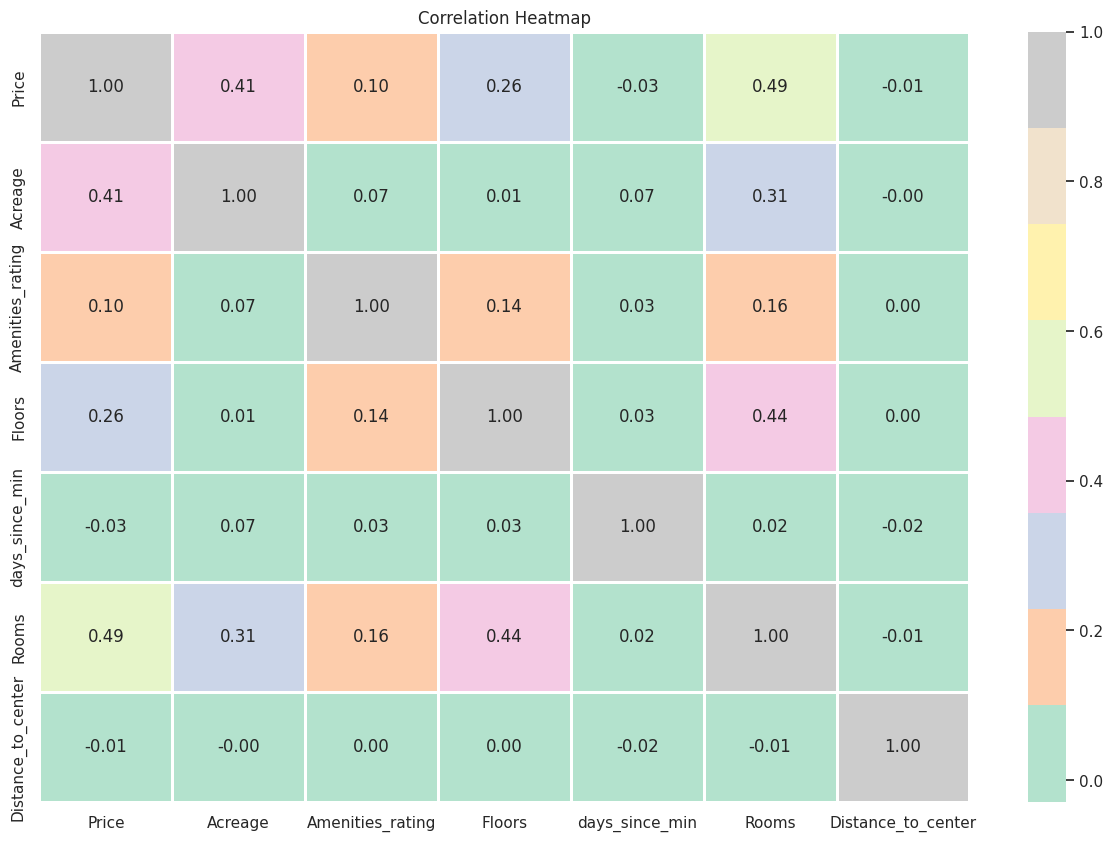

In [ ]:
# Tính ma trận tương quan cho tất cả các cột
corr_matrix = data.corr()

# Thiết lập hình matplotlib
plt.figure(figsize=(15, 10))

# Sử dụng Seaborn để tạo bản đồ nhiệt
sns.heatmap(corr_matrix, annot= True, fmt = '.2f', cmap = 'Pastel2', linewidths = 2)

# Tiêu đề
plt.title('Correlation Heatmap')

In [ ]:
X = data.drop('Price',axis=1)
y = data['Price']
print(X.shape)
print(y.shape)

(4633, 6)
(4633,)


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
##70%-train,15%-validation,15%-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (3243, 6) 	y_train: (3243,)
Testing size: 	X_test: (1390, 6) 	y_test: (1390,)


In [ ]:
columns = X_train.columns.values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Fit scaler trên tập huấn luyện và transform cả tập huấn luyện và tập kiểm tra
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (3243, 6) 	y_train: (3243,)
Testing size: 	X_test: (1390, 6) 	y_test: (1390,)


In [ ]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

**Đoạn code trên sẽ lưu scaler lại để hỗ trợ cho app**

**Đoạn mã trên được dùng để lưu lại scaler để có thể triển khai nó lên ứng dụng**

## Baseline Model - Original - Linear Regression

 **Ý tưởng:**

* Linear Regression (Hồi quy tuyến tính) là một trong những thuật toán học có giám sát cơ bản và phổ biến nhất, sử dụng để dự đoán giá trị liên tục của biến mục tiêu dựa trên một hoặc nhiều biến đầu vào.

* Thuật toán này có thể được sử dụng để giải quyết các bài toán hồi quy (dự đoán giá trị số).




> **Ưu điểm:**

* Dễ hiểu và dễ triển khai, đặc biệt với các bài toán đơn giản.

* Có thể diễn giải được các hệ số, giúp hiểu rõ mối quan hệ giữa các biến đầu vào và biến mục tiêu.

* Khi dữ liệu tuyến tính, mô hình hồi quy tuyến tính cho kết quả chính xác và hiệu quả.

* Thời gian tính toán nhanh, phù hợp với dữ liệu lớn và đơn giản.
* Hồi quy tuyến tính là một công cụ mạnh mẽ và cơ bản trong học máy và thống kê, với nhiều ứng dụng trong dự báo và phân tích dữ liệu.

* Việc hiểu rõ và sử dụng đúng hồi quy tuyến tính giúp cho việc giải quyết nhiều bài toán thực tiễn một cách hiệu quả và chính xác.

In [ ]:
linear_regression = linear_model.LinearRegression()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_regression.predict(X_train)
print(">> Train R2: ",r2_score(y_train,train_pred))
print(">> Train MSE: ", mean_squared_error(train_pred, y_train))
print(">> Train MAE: ", mean_absolute_error(train_pred, y_train))
# Sử dụng cross-validation để đánh giá hiệu suất trên tập huấn luyện
cv_scores = cross_val_score(linear_regression, X_train, y_train, cv=5, scoring='r2')

# In kết quả R2 trung bình từ cross-validation trên tập huấn luyện
print("Cross-validated R2 trên tập huấn luyện:", np.mean(cv_scores))

>> Train R2:  0.3242990241047611
>> Train MSE:  4.698280191689881
>> Train MAE:  1.5814289966979393
Cross-validated R2 trên tập huấn luyện: 0.31847711570048454


In [ ]:
test_pred = linear_regression.predict(X_test)
mse_LNR = mean_squared_error(test_pred, y_test)
mae_LNR = mean_absolute_error(test_pred, y_test)
print(">> Test R2: ",r2_score( y_test,test_pred))
print(">> Test MSE: ", mse_LNR)
print(">> Test MAE: ", mae_LNR)

>> Test R2:  0.3120382672487262
>> Test MSE:  4.757181111956865
>> Test MAE:  1.5956285173414537


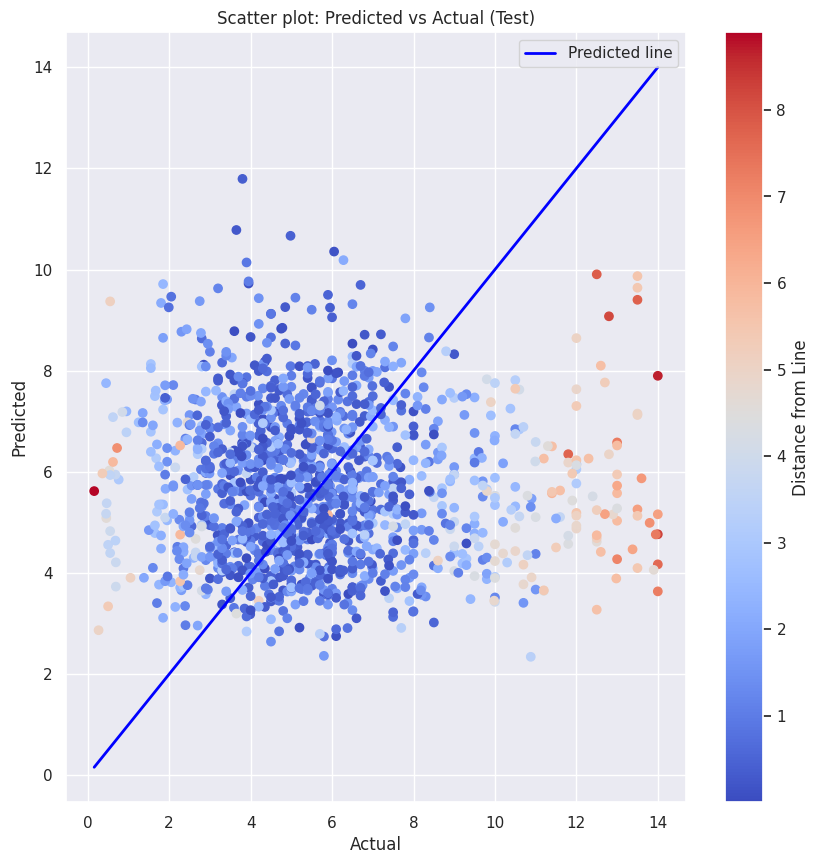

In [ ]:
# Đặt lại chỉ mục của y_test
y_test_reset_index = y_test.reset_index(drop=True)
# Sắp xếp chỉ mục
sorted_indexes = np.argsort(y_test_reset_index)
# Sử dụng chỉ mục đã sắp xếp để sắp xếp lại y_test
y_test_sorted = y_test_reset_index[sorted_indexes]
y_pred_test_sorted = test_pred[sorted_indexes]

distances = np.abs(test_pred - y_test)
# Vẽ scatter plot giữa dữ liệu dự đoán và thực tế trên tập kiểm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# Vẽ đường fit (đường thẳng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Thêm colorbar để hiển thị biểu diễn màu sắc của khoảng cách
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression with Regularization L1 (Lasso Regression)

> **Ý tưởng:**

* Lasso Regression (Least Absolute Shrinkage and Selection Operator) là một phương pháp hồi quy tuyến tính có sử dụng kỹ thuật regularization để giảm thiểu hiện tượng quá khớp (overfitting) và thực hiện lựa chọn biến (feature selection).

* Kỹ thuật này bổ sung một ràng buộc \( L1 \) (absolute value of coefficients) vào hàm mất mát, nhằm mục đích làm giảm bớt các hệ số của các biến ít quan trọng về bằng 0, từ đó loại bỏ chúng khỏi mô hình.

> **Ưu điểm:**

* Thực hiện lựa chọn biến tự động, loại bỏ các biến không quan trọng khỏi mô hình.
* Giảm thiểu hiện tượng quá khớp (overfitting) bằng cách điều chỉnh độ phức tạp của mô hình.
* Đặc biệt hiệu quả khi số lượng biến đầu vào lớn so với số lượng mẫu.
* Lasso Regression là một công cụ mạnh mẽ và hiệu quả trong việc giảm thiểu hiện tượng quá khớp và thực hiện lựa chọn biến.
* Việc hiểu rõ và sử dụng đúng Lasso Regression giúp cho việc giải quyết nhiều bài toán thực tiễn một cách hiệu quả và chính xác.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Định nghĩa pipeline chỉ với Lasso Regression
pipeline = Pipeline([
    ('lasso', linear_model.Lasso())  # Lasso Regression
])

# Định nghĩa tham số grid để thử nghiệm alpha của Lasso Regression
param_grid = {'lasso__alpha': [0.0015, 0.015, 0.15, 1, 10, 100]}

# Sử dụng GridSearchCV để tìm giá trị alpha tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất đã tìm được
best_alpha = grid_search.best_params_['lasso__alpha']
print("Best alpha for Lasso:", best_alpha)
print("Best MSE:", -grid_search.best_score_)

# Tạo mô hình Lasso với alpha tối ưu
best_lasso_model = linear_model.Lasso(alpha=best_alpha)

# Huấn luyện mô hình trên tập huấn luyện
best_lasso_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tính toán các chỉ số
train_lasso_pred = best_lasso_model.predict(X_train)
print(">> Train R2: ", r2_score(y_train, train_lasso_pred))
print(">> Train MSE: ", mean_squared_error(y_train, train_lasso_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_lasso_pred))

# Sử dụng cross-validation để đánh giá hiệu suất trên tập huấn luyện
cv_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 trên tập huấn luyện:", np.mean(cv_scores))

# Dự đoán trên tập kiểm tra và tính toán các chỉ số
test_lasso_pred = best_lasso_model.predict(X_test)
print(">> Test R2: ", r2_score(y_test, test_lasso_pred))
print(">> Test MSE: ", mean_squared_error(y_test, test_lasso_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_lasso_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha for Lasso: 0.0015
Best MSE: 4.726624466191419
>> Train R2:  0.32429714901249673
>> Train MSE:  4.6982932295707736
>> Train MAE:  1.5815607250416623
Cross-validated R2 trên tập huấn luyện: 0.31846435824169794
>> Test R2:  0.31216414861454156
>> Test MSE:  4.756310655901978
>> Test MAE:  1.5955144493968603


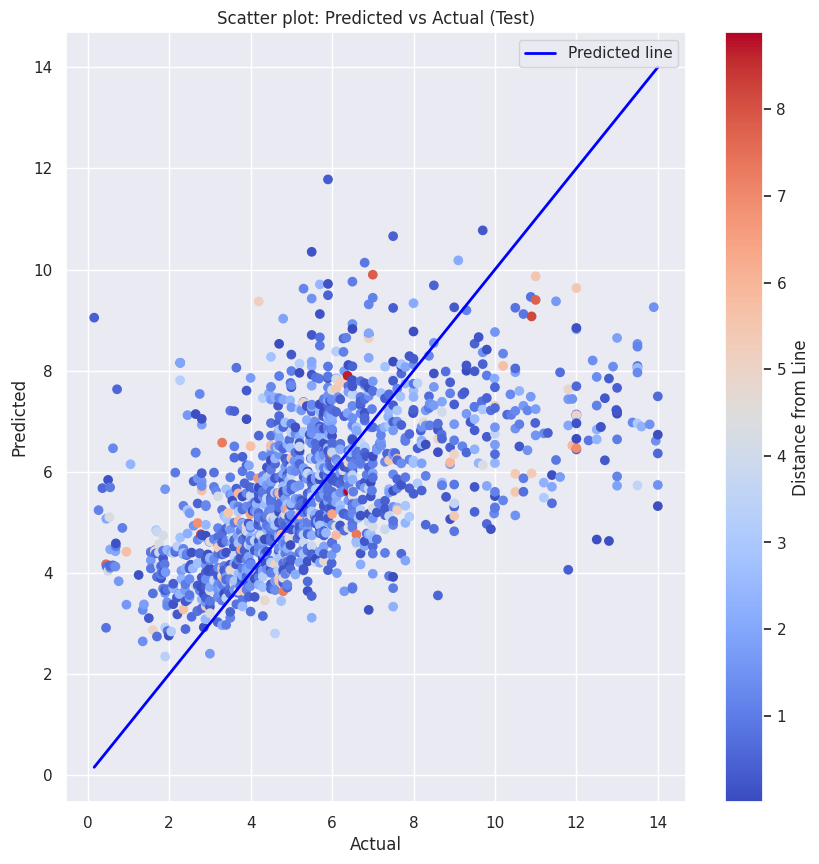

In [ ]:
y_pred_test_sorted = test_lasso_pred[sorted_indexes]

distances = np.abs(test_lasso_pred - y_test)
# Vẽ scatter plot giữa dữ liệu dự đoán và thực tế trên tập kiểm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# Vẽ đường fit (đường thẳng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Thêm colorbar để hiển thị biểu diễn màu sắc của khoảng cách
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression with Regularization L2 (Ridge Regression)

> **Ý tưởng:**

* Ridge Regression (Hồi quy Ridge) là một phương pháp hồi quy tuyến tính có sử dụng kỹ thuật regularization để giảm thiểu hiện tượng quá khớp (overfitting).

* Kỹ thuật này bổ sung một ràng buộc \( L2 \) (bình phương của các hệ số) vào hàm mất mát, nhằm mục đích làm giảm bớt giá trị tuyệt đối của các hệ số, nhưng không đặt chúng về bằng 0.

> **Ưu điểm:**

* Giảm thiểu hiện tượng quá khớp (overfitting) bằng cách điều chỉnh độ phức tạp của mô hình.
* Hoạt động tốt trong trường hợp số lượng biến lớn hơn số lượng mẫu.
* Giữ lại tất cả các biến đầu vào trong mô hình, không loại bỏ chúng.
* Ridge Regression là một công cụ mạnh mẽ và hiệu quả trong việc giảm thiểu hiện tượng quá khớp và cải thiện hiệu suất của mô hình.
* Việc hiểu rõ và sử dụng đúng Ridge Regression giúp cho việc giải quyết nhiều bài toán thực tiễn một cách hiệu quả và chính xác.





In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Định nghĩa pipeline với StandardScaler và Ridge Regression
pipeline = Pipeline([
    ('ridge', Ridge())  # Ridge Regression
])

# Định nghĩa tham số grid để thử nghiệm alpha của Ridge Regression
param_grid = {'ridge__alpha': [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100]}

# Sử dụng GridSearchCV để tìm giá trị alpha tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất đã tìm được
best_alpha = grid_search.best_params_['ridge__alpha']
print("Best alpha for Ridge:", best_alpha)
print("Best MSE:", -grid_search.best_score_)

# Huấn luyện lại pipeline với alpha tốt nhất
best_ridge_model = linear_model.Ridge(alpha= best_alpha)

best_ridge_model.fit(X_train,y_train)
# Dự đoán trên tập huấn luyện và tính toán các chỉ số
train_ridge_pred = best_ridge_model.predict(X_train)
print(">> Train R2: ", r2_score(y_train, train_ridge_pred))
print(">> Train MSE: ", mean_squared_error(y_train, train_ridge_pred))
print(">> Train MAE: ", mean_absolute_error(y_train, train_ridge_pred))

# Sử dụng cross-validation để đánh giá hiệu suất trên tập huấn luyện
cv_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 trên tập huấn luyện:", np.mean(cv_scores))

# Dự đoán trên tập kiểm tra và tính toán các chỉ số
test_ridge_pred = best_ridge_model.predict(X_test)
print(">> Test R2: ", r2_score(y_test, test_ridge_pred))
print(">> Test MSE: ", mean_squared_error(y_test, test_ridge_pred))
print(">> Test MAE: ", mean_absolute_error(y_test, test_ridge_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best alpha for Ridge: 10
Best MSE: 4.726395788569606
>> Train R2:  0.3242973374454985
>> Train MSE:  4.698291919359495
>> Train MAE:  1.5815826810991085
Cross-validated R2 trên tập huấn luyện: 0.318499813482244
>> Test R2:  0.3120732723422275
>> Test MSE:  4.756939055514335
>> Test MAE:  1.5956560700593894


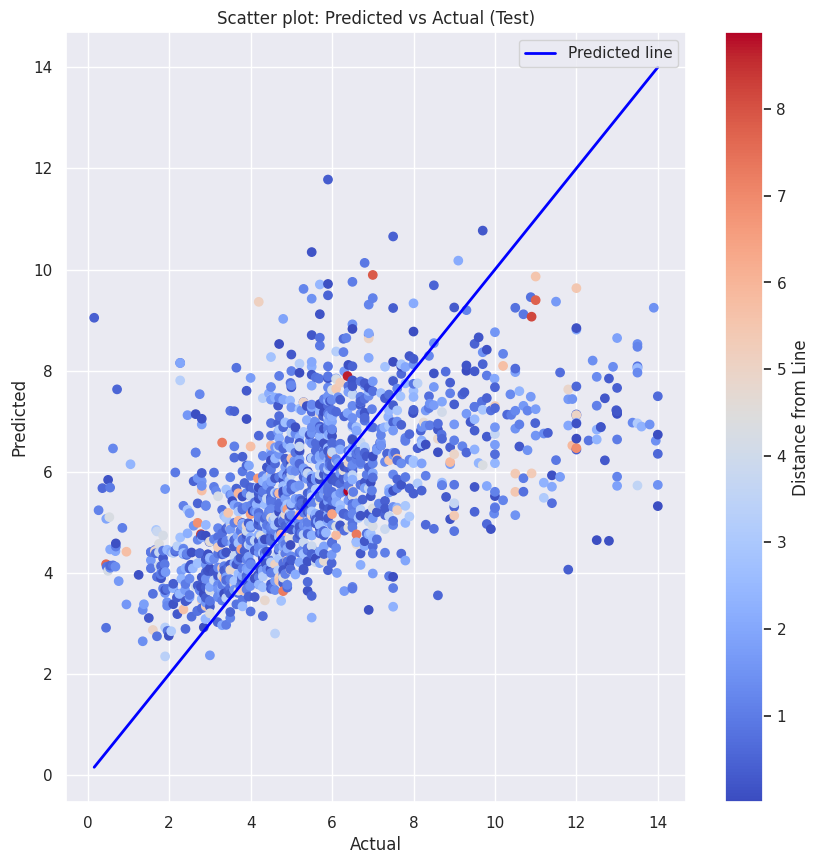

In [ ]:
y_pred_test_sorted = test_ridge_pred[sorted_indexes]

distances = np.abs(test_ridge_pred - y_test)
# Vẽ scatter plot giữa dữ liệu dự đoán và thực tế trên tập kiểm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# Vẽ đường fit (đường thẳng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Thêm colorbar để hiển thị biểu diễn màu sắc của khoảng cách
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

**Ta thấy khi thêm Regularization vào thì mô hình vẫn không được cải thiện nhiều về hiệu suất, do bộ dữ liệu sau khi được clean chứa khá ít nhiễu và tương quan giữa các biến đầu vào không quá cao vì thế khi không thêm Regularization vào thì mô hình vẫn có thể đạt được hiệu suất tốt**

##Ridge Regression - Using Polinomial

> **Ý tưởng:**

* Ridge Regression with Polynomial Features là một phương pháp kết hợp giữa Ridge Regression và việc mở rộng các biến đầu vào bằng cách sử dụng các đặc trưng đa thức (polynomial features).

* Bằng cách thêm các đặc trưng đa thức của các biến đầu vào, mô hình có thể bắt đầu học các mối quan hệ phi tuyến tính giữa các biến đầu vào và biến mục tiêu.

* Sử dụng Ridge Regression giúp kiểm soát độ phức tạp của mô hình bằng cách áp đặt một ràng buộc \( L2 \) lên các hệ số, từ đó giảm thiểu hiện tượng quá khớp (overfitting) do số lượng biến tăng lên.

> **Ưu điểm:**

* Cho phép mô hình học các mối quan hệ phi tuyến tính giữa biến đầu vào và biến mục tiêu.
* Sử dụng Ridge Regression giúp kiểm soát độ phức tạp của mô hình và giảm thiểu hiện tượng quá khớp (overfitting).

> **Quy trình thực hiện:**

1. **Tạo các đặc trưng đa thức:**
   * Sử dụng các hàm tạo đặc trưng đa thức từ các thư viện như `PolynomialFeatures` trong `scikit-learn`.

2. **Áp dụng Ridge Regression và tuning:**
   * Huấn luyện mô hình Ridge Regression trên dữ liệu đã mở rộng.

3. **Đánh giá mô hình:**
   * Sử dụng các số liệu đánh giá như MAE, MSE,r2 để đánh giá hiệu suất của mô hình trên tập kiểm tra.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Định nghĩa pipeline để chuẩn bị các đặc trưng đa thức và huấn luyện Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

# Định nghĩa tham số grid để thử nghiệm các bậc đa thức và siêu tham số Ridge Regression
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],  # Các bậc đa thức để kiểm tra
    'ridge__alpha': [0.00015, 0.0015, 0.015, 0.15, 1, 10, 100, 1000, 10000]  # Các giá trị alpha của Ridge Regression để kiểm tra
}

# Sử dụng GridSearchCV để tìm tham số tốt nhất
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Huấn luyện mô hình trên tập huấn luyện
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất đã tìm được
print("Best Parameters:", grid_search.best_params_)

# Định nghĩa lại pipeline với bậc tốt nhất là 2 và alpha tốt nhất
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_params_['ridge__alpha']

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])

# Fit pipeline vào dữ liệu huấn luyện
pipeline.fit(X_train, y_train)


# Dự đoán trên X_test đã scale
y_pred_Ridge_Poly = pipeline.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse_Ridge_poly = mean_squared_error(y_test, y_pred_Ridge_Poly)
mae_Ridge_poly = mean_absolute_error(y_test, y_pred_Ridge_Poly)
r2 = r2_score(y_test, y_pred_Ridge_Poly)

print(f"Mean Squared Error (MSE): {mse_Ridge_poly}")
print(f"Mean Absolute Error (MSE): {mae_Ridge_poly}")
print(f"R-squared (R2): {r2}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'poly__degree': 2, 'ridge__alpha': 100}
Mean Squared Error (MSE): 4.531280754632866
Mean Absolute Error (MSE): 1.5682009785796653
R-squared (R2): 0.3447069417423534


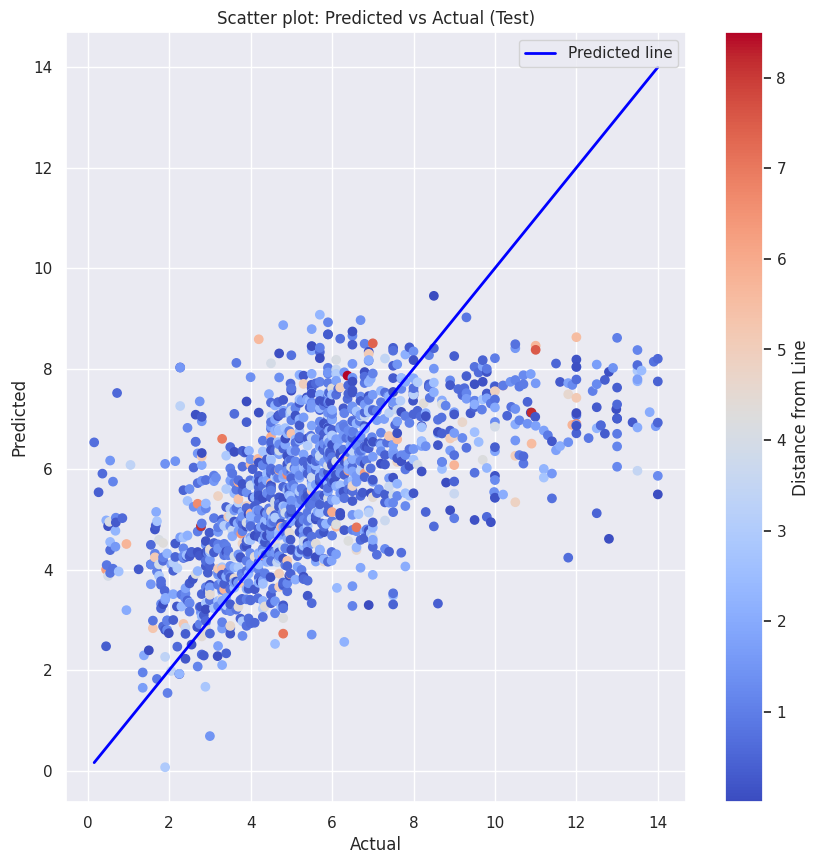

In [ ]:
y_pred_test_sorted = y_pred_Ridge_Poly[sorted_indexes]

distances = np.abs(y_pred_Ridge_Poly - y_test)
# Vẽ scatter plot giữa dữ liệu dự đoán và thực tế trên tập kiểm tra
plt.figure(figsize=(10, 10))
plt.scatter(y_test_sorted, y_pred_test_sorted, c=distances,cmap='coolwarm' )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot: Predicted vs Actual (Test)')

# Vẽ đường fit (đường thẳng y = x)
plt.plot(y_test_sorted, y_test_sorted, color='blue', linestyle='-', linewidth=2, label='Predicted line')
# Thêm colorbar để hiển thị biểu diễn màu sắc của khoảng cách
plt.colorbar(label='Distance from Line')
plt.legend()
plt.grid(True)
plt.show()

**Phần này sẽ triển khai Polynomial trực tiếp trên Ridge Regression mà không cần phải check lại đa cộng tuyến vì Ridge có thêm Regularization L2 làm cho các trọng số đầu ra sẽ không còn bị quá phức tạp, thông qua việc dùng Grid search để tìm ra best parameters chúng ta đã nhận thấy được sự cải thiện hiệu suất của nó so với các mô Hình LNR ban đầu**

##Linear Regression Model From Scratch

###LinearRegression (Sklearn)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [ ]:
# Xác định các tính năng và biến mục tiêu:
X = data.drop('Price', axis = 1)
y = data['Price']

# Chia khung dữ liệu thành Training_set và Test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Chuẩn hóa dữ liệu huấn luyện
X_train = scaler.fit_transform(X_train)

# Chuẩn hóa dữ liệu kiểm tra (sử dụng các tham số đã học từ tập huấn luyện)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_coef = lr.coef_.reshape(-1, 1)
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(lr_coef.shape)

Training size: 	X_train: (3706, 6) 	y_train: (3706,)
(6, 1)


In [ ]:
df_coef = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficient'])
print(df_coef)

                    Coeficient
Acreage               0.773464
Amenities_rating      0.059510
Floors                0.282398
days_since_min       -0.240472
Rooms                 0.900689
Distance_to_center   -0.038449


In [ ]:
#  Sử dụng hàm có sẵn trong thư viện sklearn.metrics để tìm MSE
from sklearn.metrics import mean_squared_error

train_pred = lr.predict(X_train)
print(">> Train MSE: ", mean_squared_error(train_pred, y_train))

test_pred = lr.predict(X_test)
print(">> Test MSE:  ", mean_squared_error(test_pred, y_test))

>> Train MSE:  4.70667443833165
>> Test MSE:   4.799479929458018


Residual

In [ ]:
test_residuals = y_test - test_pred
test_residuals

3706   -0.158129
3707    3.523721
3708    1.583731
3709    0.668604
3710    0.317682
          ...   
4628   -1.745102
4629   -2.001114
4630   -0.359498
4631    1.181943
4632    0.450411
Name: Price, Length: 927, dtype: float64

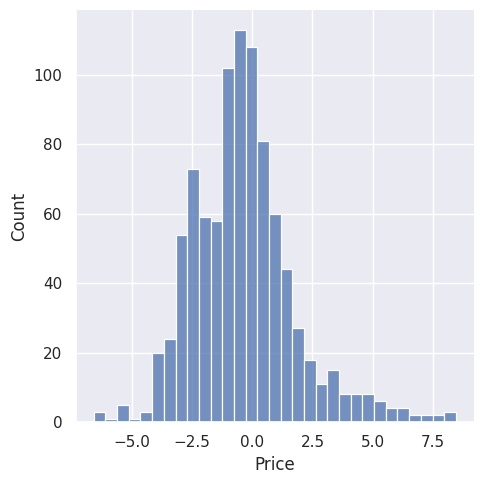

In [ ]:
sns.displot(x = test_residuals)

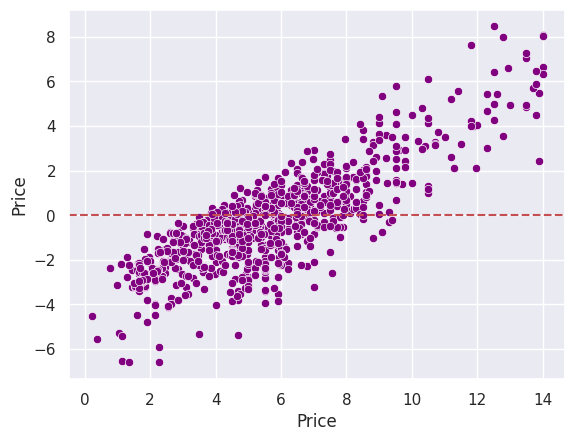

In [ ]:
sns.scatterplot(x = y_test, y = test_residuals, color = 'purple')
plt.axhline(y = 0, color= 'r', ls = '--')

In [ ]:
# Mô-đun sklearn.metrics thực hiện một số tính năng mất, điểm và tiện ích
# hàm để đo hiệu suất phân loại.
# Một số số liệu có thể yêu cầu ước tính xác suất của lớp dương,
# giá trị tin cậy hoặc giá trị quyết định nhị phân.
from sklearn import metrics

MAE_simple  = metrics.mean_absolute_error(y_test, test_pred)
MSE_simple  = metrics.mean_squared_error(y_test, test_pred)
RMSE_simple = np.sqrt(MSE_simple)
R2 = metrics.r2_score(y_test, test_pred)

pd.DataFrame([MAE_simple, MSE_simple, RMSE_simple, R2], index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,1.650044
MSE,4.799480
RMSE,2.190772
R^2,0.304242


In [ ]:
print('predicted mean:' ,np.mean(test_pred))
print('real mean:     ' ,data['Price'].mean())

predicted mean: 5.90144853156077
real mean:      5.757022534003886


In [ ]:
df_result_lr = pd.DataFrame({'Actual' : y_test, 'Predicted' : test_pred})
df_result_lr

,Actual,Predicted
3706,6.50,6.658129
3707,11.00,7.476279
3708,8.30,6.716269
3709,4.80,4.131396
3710,4.80,4.482318
...,...,...
4628,5.99,7.735102
4629,3.00,5.001114
4630,5.20,5.559498
4631,7.00,5.818057


<Axes: >

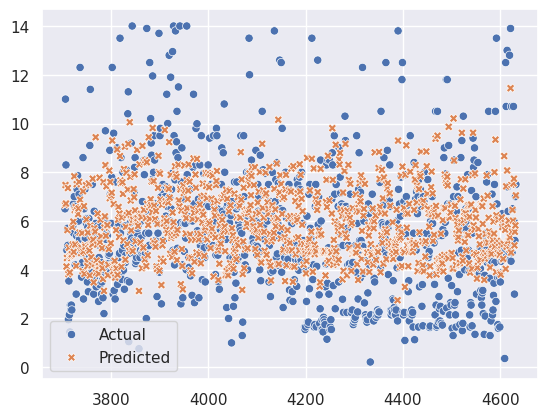

In [ ]:
sns.scatterplot(data = df_result_lr , color='blue')

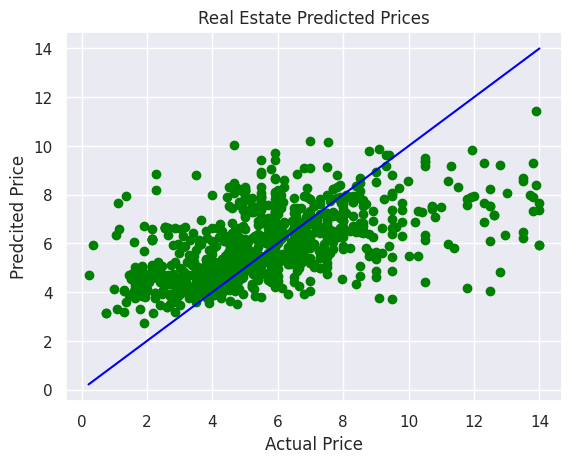

In [ ]:
plt.scatter(y_test, test_pred, color = 'green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'blue')
plt.title("Real Estate Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predcited Price")
plt.show()

###Cost function

In [ ]:
def compute_cost(X, y, w, b):
    """
    Compute cost
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    total_cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b            #(n,)(n,) = scalar
        total_cost += (f_wb_i - y[i]) ** 2      #scalar

    return J_wb

###Gradient Descent

In [ ]:
import math

def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): the gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : the gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape         #số ví dụ, đặc điểm
    dJ_dw = np.zeros((n,))
    dJ_db = 0.0

    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        dJ_dw[:n] += (f_wb_i - y[i]) * X[i, :n]
        dJ_db     += (f_wb_i - y[i])
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

def gradient_descent(X, y, w_in, b_in, lr, iter):
    """
    Performs batch gradient descent to learn (w,b). Updates (w,b) by taking
    iter gradient steps with lr

    Args:
      X (ndarray (m,n))   : data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      lr (float)          : Learning rate
      iter (int)          : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : updated values of parameters
      b (scalar)       : updated value of parameter
      """
    # Một mảng để lưu trữ giá J và w ở mỗi lần lặp, chủ yếu để vẽ đồ thị sau này
    J_hist, p_hist = [], []
    w = (w_in) #tránh sửa đổi toàn cầu w trong hàm
    b = b_in

    for i in range(iter):

        # Tính toán gradient và cập nhật các thông số
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)

        # Cập nhật thông số bằng w, b, alpha và gradient
        w -= lr * dJ_dw
        b -= lr * dJ_db

        # Tiết kiệm chi phí J ở mỗi lần lặp
        if i < 100000: #ngăn chặn cạn kiệt tài nguyên
            J_hist.append(compute_cost(X, y, w, b))
            p_hist.append([w, b])

        # Chi phí in mỗi lần 10 lần hoặc nhiều lần lặp nếu < 10
        if i % math.ceil(iter/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}")

    # Vẽ hàm chi phí J qua các lần lặp
    plt.plot(range(len(J_hist)), J_hist)
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function J')
    plt.title('Cost Function J vs. Iteration')
    plt.grid(True)
    plt.show()

    return w, b, J_hist #trả về lịch sử w, b và J cuối cùng để vẽ đồ thị

###Parameter Intialization

Iteration    0: Cost    20.01
Iteration  100: Cost     4.64
Iteration  200: Cost     2.66
Iteration  300: Cost     2.39
Iteration  400: Cost     2.36
Iteration  500: Cost     2.35
Iteration  600: Cost     2.35
Iteration  700: Cost     2.35
Iteration  800: Cost     2.35
Iteration  900: Cost     2.35


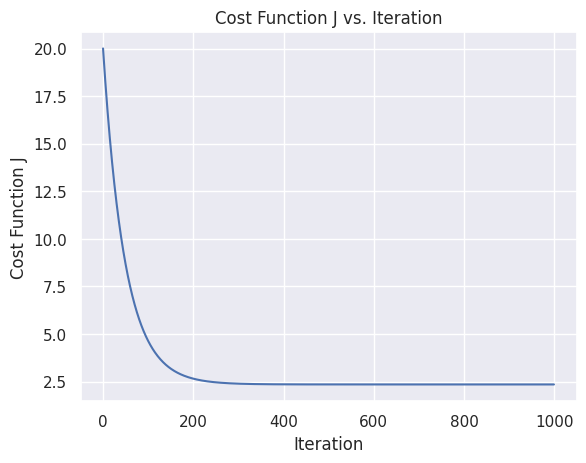

w, b found by gradient descent: [ 0.77398609  0.05956335  0.28316368 -0.2405924   0.89973364 -0.03846557], 5.81492310171581


In [ ]:
# Khởi tạo tham số
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0

# Cài đặt giảm độ dốc
iter = 1000
lr = 0.01

# Tìm Wei và Bias
wei, bias, _ = gradient_descent(X_train ,y_train, initial_w, initial_b, lr, iter)
print(f"w, b found by gradient descent: {wei}, {bias}")

###Prediction

In [ ]:
def predict(x, w, b):
    """
    S


y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], wei, bias))ingle predict using linear regression
    Args:
      x (ndarray): shape (n,) example with multiple features
      w (ndarray): shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      f (scalar):  prediction # f = np.dot(w, x) + b
    """
    return np.dot(w, x) + b

y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], wei, bias))

In [ ]:
# Tính toán sự khác biệt giữa mục tiêu dự đoán và mục tiêu thực tế
diff = (abs(y_pred - y_test) / y_test) * 100

# Bản tóm tắt
within_5per = len(diff[diff < 5])
within_10per = len(diff[diff < 10])

ratio_5per = (within_5per / y_test.shape[0]) * 100
ratio_10per = (within_10per / y_test.shape[0]) * 100

conclusion = pd.DataFrame({'<5%': [within_5per, ratio_5per],
                           '<10%': [within_10per, ratio_10per]},
                           index = ['count', 'ratio'])

# Hiệu suất
squared_errors = [(ytest - ypred) ** 2 for ytest, ypred in zip(y_test, y_pred)]
mse = sum(squared_errors) / len(squared_errors)
print(f"Mean Squared Error: {mse}\n")

# Phần kết luận
print(f"Number of test target: {y_test.shape[0]}")
print("Prediction results:\n", conclusion)

Mean Squared Error: 4.7993982103182855

Number of test target: 927
Prediction results:
               <5%        <10%
count  122.000000  246.000000
ratio   13.160734   26.537217


##XGBoost (Extreme Gradient Boosting)

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor


In [ ]:
# Định nghĩa mô hình XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán ở tập train
y_train_pred = model.predict(X_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f'Mean Squared Error train: {mse_train}')
print(f'R-squared train: {r2_train}')
print(f'Mean Absolute Error train: {mae_train}')

print(f'Mean Squared Error test: {mse_test}')
print(f'R-squared test: {r2_test}')
print(f'Mean Absolute Error test: {mae_test}')


Mean Squared Error train: 0.6838884415756232
R-squared train: 0.9014104320514655
Mean Absolute Error train: 0.5691943915560723
Mean Squared Error test: 3.8492800217763787
R-squared test: 0.4419880654542657
Mean Absolute Error test: 1.4316702378143384


**Nhận thấy được mô hình bị overfit qua các metrics, cụ thể:**
* MAE và MSE của tập train thấp hơn tập test rất nhiều.
* R2 của tập train cũng cao hơn tập test. <br>
=> chứng tỏ mô hình đang bị overfitting vì nó đã quá " học thuộc " tập train làm cho mô hình bị phức tạp.<br>




**Vậy để khắc phục vấn đề này ta sẽ thêm Regularization và điều chỉnh các siêu tham số để mô hình không còn bị phức tạp nữa**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

param_distributions = {
'max_depth': np.arange(2, 7),
'learning_rate': np.arange(0.01, 1.5, 0.01),
'n_estimators': np.arange(700, 4001, 10),
'gamma': np.arange(5, 101, 3),
'subsample': np.arange(0.3, 0.7, 0.1),
'colsample_bytree': np.arange(0.5, 0.8, 0.05),
'colsample_bylevel': np.arange(0.5, 0.8, 0.05),
'reg_alpha': np.arange(1, 40, 1),
'reg_lambda': np.arange(1, 40, 1),
}


random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train, verbose=True)

best_model = random_search.best_estimator_

print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print()

# Predictions on test data
y_pred_test = best_model.predict(X_test)

# Predictions on train data
y_pred_train = best_model.predict(X_train)

# Metrics for test data
mse_GB_test = mean_squared_error(y_test, y_pred_test)
mae_GB_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Metrics for train data
mse_GB_train = mean_squared_error(y_train, y_pred_train)
mae_GB_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f'Metrics on Test Data:')
print(f'Mean Squared Error: {mse_GB_test}')
print(f'Mean Absolute Error: {mae_GB_test}')
print(f'R-squared: {r2_test}')
print()

print(f'Metrics on Train Data:')
print(f'Mean Squared Error: {mse_GB_train}')
print(f'Mean Absolute Error: {mae_GB_train}')
print(f'R-squared: {r2_train}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV:
{'subsample': 0.3, 'reg_lambda': 14, 'reg_alpha': 12, 'n_estimators': 1410, 'max_depth': 5, 'learning_rate': 0.06999999999999999, 'gamma': 11, 'colsample_bytree': 0.7500000000000002, 'colsample_bylevel': 0.55}

Metrics on Test Data:
Mean Squared Error: 3.7946222917762524
Mean Absolute Error: 1.4036049150829046
R-squared: 0.44991153828105523

Metrics on Train Data:
Mean Squared Error: 3.4388067166609737
Mean Absolute Error: 1.3442876679757945
R-squared: 0.5042605667190028


**Sau khi tuning đã nhận được 1 mô hình khá ổn và không còn bị overfit nữa**

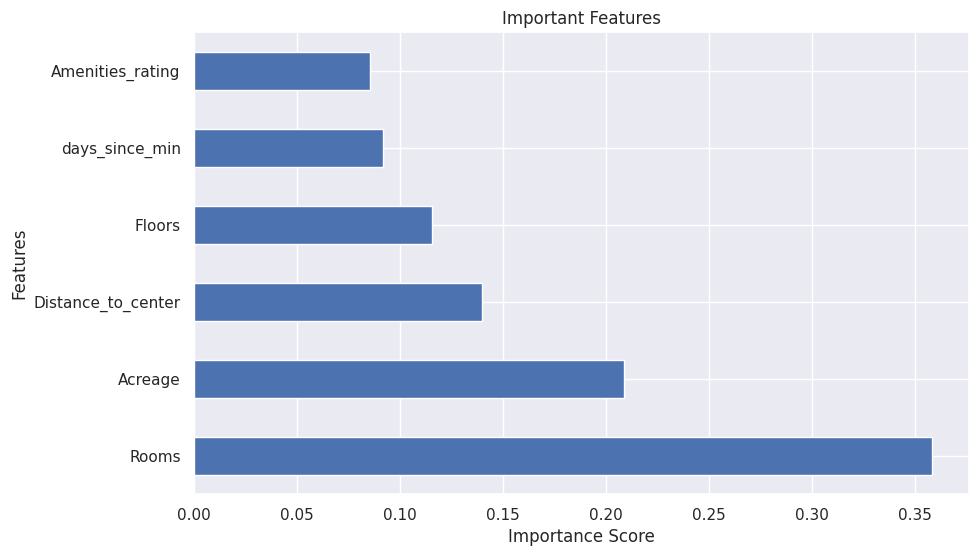

In [ ]:
feature_importances = best_model.feature_importances_

feature_importance = pd.Series(feature_importances, index=columns)


top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Gradient Boosting From Scratch

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Step 1**: `Node` Lưu trữ thông tin của một nút trong cây quyết định.

`Hàm __init__` **(self, info, left=None, right=None):**

**Ý nghĩa:** Khởi tạo một đối tượng Node trong cây quyết định.

**Tham số:**
- info: Thông tin của nút (có thể là thông tin về phân chia hoặc giá trị dự đoán).
- left: Con trỏ đến nút con bên trái.
- right: Con trỏ đến nút con bên phải.

**Mục đích:** Lưu trữ và quản lý cấu trúc dữ liệu của cây quyết định.

**Quá trình:** Khởi tạo các thuộc tính info, left, right khi tạo một đối tượng Node mới.

In [ ]:
class Node:
    def __init__(self, info, left=None, right=None):
        self.info = info
        self.left = left
        self.right = right


### **Step 2:** `DecisionTreeRegressor` Xây dựng và dự đoán từng cây quyết định trong mô hình hồi quy.




**`Hàm __init__`(self, min_samples_split=2, min_samples_leaf=1, max_depth=3):**

- **Ý nghĩa:** Khởi tạo một đối tượng cây quyết định cho bài toán hồi quy.

- **Tham số:**
 - `min_samples_split`: Số lượng mẫu tối thiểu cần để tiếp tục phân chia một nút.
 - `min_samples_leaf`: Số lượng mẫu tối thiểu cho mỗi nút lá.
 - `max_depth`: Độ sâu tối đa của cây.

- **Mục đích:** Định nghĩa các tham số và cài đặt các phương thức để xây dựng cây quyết định.

- **Quá trình:** Lưu trữ các tham số như min_samples_split, min_samples_leaf, max_depth và khởi tạo thuộc tính root (nút gốc của cây).















`Hàm build_tree`(self, X, Y, cur_depth=0):
- **Ý nghĩa:** Xây dựng cây quyết định từ dữ liệu huấn luyện.

- **Tham số:**
 - `X`: Ma trận đặc trưng (features).
 - `Y`: Vector nhãn mục tiêu (target).
 - `cur_depth`: Độ sâu hiện tại của nút đang xét.

- **Mục đích:** Đệ quy xây dựng cây từ nút gốc đến các nút lá.

- **Quá trình:**
 - Gọi get_best_split(X, Y) để tìm phép chia tốt nhất dựa trên RSS.
 - Nếu đủ điều kiện để phân chia (số mẫu đủ lớn, chưa đạt độ sâu tối đa và có thể phân chia tốt hơn), tạo các nhánh trái và phải và đệ quy xây dựng cây từng nhánh.
 - Nếu không đủ điều kiện phân chia, tạo một nút lá.

**`Hàm get_best_split`(self, X, Y):**
- **Ý nghĩa:** Tìm phép chia tốt nhất cho một nút trong cây.

- **Tham số:**
 - `X`: Ma trận đặc trưng (features).
 - `Y`: Vector nhãn mục tiêu (target).

- **Mục đích:** Tối ưu hóa việc phân chia dữ liệu dựa trên độ giảm RSS.

- **Quá trình:**
 - Duyệt qua từng đặc trưng để tìm phép chia tốt nhất.
 - Sắp xếp dữ liệu theo từng đặc trưng và tính toán RSS cho từng phân chia có thể.
 - Lựa chọn phép chia mà có độ giảm RSS lớn nhất.

**`Hàm fit`(self, X, Y):**
- **Ý nghĩa:** Huấn luyện mô hình cây quyết định trên dữ liệu huấn luyện.

- **Tham số:**
 - `X`: Ma trận đặc trưng (features).
 - `Y`: Vector nhãn mục tiêu (target).

- **Mục đích:** Xây dựng cây quyết định từ dữ liệu huấn luyện.

- **Quá trình:**
Gọi build_tree(X, Y) để xây dựng cây quyết định và lưu cây vào thuộc tính root.

**`Hàm make_prediction`(self, x, tree):**
- **Ý nghĩa:** Dự đoán giá trị cho một mẫu đơn bằng cách đi xuống cây quyết định.

- **Tham số:**
 - `x`: Mẫu đầu vào cần dự đoán.
 - `tree`: Cây quyết định đã huấn luyện.

- **Mục đích:** Dự đoán giá trị dựa trên cây quyết định.

- **Quá trình:**
 - Nếu đang ở một nút lá, trả về giá trị trung bình của các mẫu huấn luyện trong nút.
 - Nếu không phải lá, đi xuống nhánh trái hoặc phải của cây dựa trên giá trị của đặc trưng của mẫu.

**`Hàm predict`(self, X):**
- **Ý nghĩa:** Dự đoán giá trị cho một tập dữ liệu đầu vào.

- **Tham số:**
 - `X`: Ma trận đặc trưng (features).

- **Mục đích:** Dự đoán giá trị cho từng mẫu trong tập dữ liệu đầu vào.

- **Quá trình:**
Dùng make_prediction(x, self.root) để dự đoán từng mẫu trong X dựa trên cây quyết định đã huấn luyện.

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=3):
        self.root = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth

    def build_tree(self, X, Y, cur_depth=0):
        best_split = self.get_best_split(X, Y)
        if X.shape[0] >= self.min_samples_split and cur_depth < self.max_depth and best_split["rss"] < float('inf'):
            left_index = X[:, best_split["feature_index"]] <= best_split["threshold"]
            right_index = X[:, best_split["feature_index"]] > best_split["threshold"]
            X_left, Y_left = X[left_index], Y[left_index]
            X_right, Y_right = X[right_index], Y[right_index]
            left_subtree = self.build_tree(X_left, Y_left, cur_depth + 1)
            right_subtree = self.build_tree(X_right, Y_right, cur_depth + 1)
            return Node(best_split, left_subtree, right_subtree)
        best_split["values"] = Y
        return Node(best_split)

    def get_best_split(self, X, Y):
        best_split = {"rss": float('inf')}
        for feature_index in range(X.shape[1]):
            indices = np.argsort(X[:, feature_index])
            X_sort, Y_sort = X[indices, feature_index], Y[indices]
            left_sumsq, left_sum = 0, 0
            right_sumsq, right_sum = np.sum(Y_sort * Y_sort), np.sum(Y_sort)
            N_L = 0
            N_R = N_t = len(Y_sort)
            for i in range(N_t - 1):
                left_sumsq, left_sum = left_sumsq + Y_sort[i] ** 2, left_sum + Y_sort[i]
                right_sumsq, right_sum = right_sumsq - Y_sort[i] ** 2, right_sum - Y_sort[i]
                N_L, N_R = N_L + 1, N_R - 1
                if N_L >= self.min_samples_leaf and N_R >= self.min_samples_leaf:
                    rss = (left_sumsq - left_sum ** 2 / N_L) + (right_sumsq - right_sum ** 2 / N_R)
                    if rss < best_split["rss"]:
                        best_split["rss"] = rss
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = X_sort[i]
        return best_split

    def fit(self, X, Y):
        self.root = self.build_tree(X, Y)
        return self

    def make_prediction(self, x, tree):
        if "values" in tree.info:
            return tree.info["values"].mean()
        feature_val = x[tree.info["feature_index"]]
        if feature_val <= tree.info["threshold"]:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def predict(self, X):
        return np.array([self.make_prediction(x, self.root) for x in X])

### **Step 3:** `GradientBoostingRegressor` Xây dựng và sử dụng nhiều cây quyết định để tối ưu hóa dự đoán liên tục qua từng vòng lặp.

**`Hàm __init__`(self, learning_rate=0.1, min_samples_leaf=1, max_depth=3, n_estimators=10):**
- **Ý nghĩa:** Khởi tạo một đối tượng mô hình Gradient Boosting Regressor.
- **Tham số:**
 - `learning_rate`: Tốc độ học của mô hình.
 - `min_samples_leaf`: Số lượng mẫu tối thiểu cho mỗi nút lá trong các cây quyết định.
 - `max_depth`: Độ sâu tối đa của các cây quyết định.
 - `n_estimators`: Số lượng cây quyết định (tức là số lượng vòng lặp trong quá trình huấn luyện).
- **Mục đích:** Định nghĩa các tham số và cài đặt các phương thức để xây dựng và sử dụng mô hình Gradient Boosting.
- **Quá trình:** Lưu trữ các tham số và khởi tạo các thuộc tính như trees (danh sách các cây quyết định) và initial_prediction (giá trị dự đoán ban đầu).

**`Hàm fit`(self, X, y):**
- **Ý nghĩa:** Huấn luyện mô hình Gradient Boosting trên dữ liệu huấn luyện.
- **Tham số:**
 - `X`: Ma trận đặc trưng (features).
 - `y`: Vector nhãn mục tiêu (target).
- **Mục đích:** Xây dựng mô hình Gradient Boosting từ dữ liệu huấn luyện.
- **Quá trình:**
 - Khởi tạo y_pred bằng giá trị trung bình của y.
 - Lặp qua từng n_estimators:
   - Tính residual (residuals) giữa y và y_pred.
   - Tạo một cây quyết định mới (tree) và huấn luyện nó với residuals.
   - Cập nhật y_pred bằng cộng dồn learning_rate nhân với kết quả dự đoán từ cây quyết định.
   - Lưu cây quyết định vào danh sách self.trees.
 - Trả về mô hình đã huấn luyện.

**`Hàm predict`(self, X):**
- **Ý nghĩa:** Dự đoán giá trị cho một tập dữ liệu đầu vào bằng mô hình đã huấn luyện.
- **Tham số:**
 - `X`: Ma trận đặc trưng (features).
- Mục đích: Dự đoán giá trị cho từng mẫu trong tập dữ liệu đầu vào.
- **Quá trình:**
 - Khởi tạo y_pred bằng giá trị dự đoán ban đầu (initial_prediction).
 - Duyệt qua từng cây quyết định trong self.trees và cộng dồn kết quả dự đoán của từng cây nhân với learning_rate.
 - Trả về y_pred, tức là dự đoán của mô hình Gradient Boosting cho tập dữ liệu X.

In [ ]:
class GradientBoostingRegressor:
    def __init__(self, learning_rate=0.01, min_samples_leaf=1, max_depth=3, n_estimators=1001):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.n_estimators = n_estimators

    def fit(self, X, y):
        self.trees = []
        self.initial_prediction = np.mean(y)
        y_pred = np.full_like(y, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

        return self

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


### Step 4: Huấn luyện và đánh giá

In [ ]:
# Đọc dữ liệu từ file CSV
#file_path = 'clean_data (2).csv'
#data = pd.read_csv(file_path)

# Tách dữ liệu thành các biến đầu vào (X) và biến mục tiêu (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = y_train.values

In [ ]:
# Huấn luyện mô hình Gradient Boosting
n_estimators = 1001
learning_rate = 0.01
max_depth = 3
min_samples_leaf = 1

gbm = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
gbm.fit(X_train, y_train)


In [ ]:
# Dự đoán trên tập huấn luyện
train_pred = gbm.predict(X_train)

# Đánh giá trên tập huấn luyện
train_mae = mean_absolute_error(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Training set evaluation:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R2: {train_r2}")

# Dự đoán trên tập kiểm tra
test_pred = gbm.predict(X_test)

# Đánh giá trên tập kiểm tra
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("Testing set evaluation:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R2: {test_r2}")


Training set evaluation:
MAE: 1.406290648095382
MSE: 3.700695284125993
R2: 0.4677704792068952
Testing set evaluation:
MAE: 1.4795789008850055
MSE: 4.057758356015275
R2: 0.41318558112623305


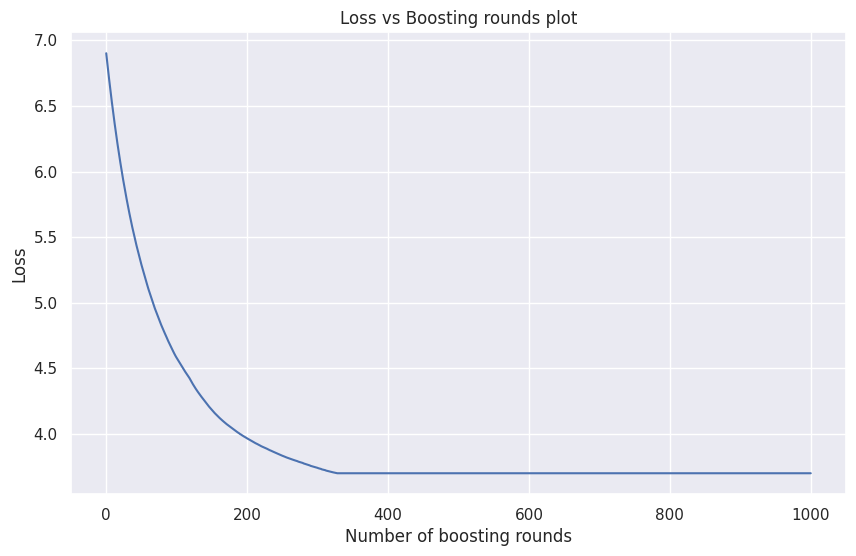

In [ ]:
# Vẽ đồ thị loss (MSE) theo số lượng vòng lặp
losses = []
y_pred = np.full_like(y_train, gbm.initial_prediction)
for i, tree in enumerate(gbm.trees):
    y_pred += gbm.learning_rate * tree.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=range(len(losses)), y=losses)
ax.set(xlabel='Number of boosting rounds', ylabel='Loss', title='Loss vs Boosting rounds plot')
plt.show()


##Random Forest

>**Ý tưởng:**

* Rừng ngẫu nhiên / Rừng cây (Random Forest) là một trong những thuật toán học có giám sát **tree-based (Dựa trên cây)** phổ biến nhất. Nó cũng là một trong những thuật toán linh hoạt và dễ sử dụng nhất.

* Thuật toán này có thể được sử dụng để giải quyết cả bài toán phân loại và hồi quy.

* Mô hình rừng cây được huấn luyện dựa trên sự phối hợp giữa luật ***kết hợp (ensembling)*** và quá trình ***lấy mẫu tái lặp (boostrapping)***

* Cụ thể thuật toán này tạo ra nhiều cây quyết định mà mỗi cây quyết định được huấn luyện dựa trên nhiều mẫu con khác nhau và kết quả dự báo là bầu cử (voting) từ toàn bộ những cây quyết định.


>**Ưu điểm**

* Do một kết quả dự báo được tổng hợp từ nhiều mô hình nên kết quả của chúng sẽ không bị chệch.

* Đồng thời kết hợp kết quả dự báo từ nhiều mô hình sẽ có phương sai nhỏ hơn so với chỉ một mô hình. Điều này giúp cho mô hình khắc phục được hiện tượng quá khớp (overfitting).

>**Mô hình kết hợp (ensemble model)**

* Là kết hợp nhiều mô hình để thực hiện dự báo kết quả. Mỗi mô hình sẽ có một dự báo riêng và ta sẽ thực hiện Bầu Cử (Voting) để tìm ra kết quả cho mô hình kết hợp.

* Thông thường những kết quả từ mô hình kết hợp sẽ tốt hơn so với chỉ sử dụng một mô hình bởi chúng ta đang vận dụng trí thông minh đám đông (wisdom of the crowd). Điều này đã được kiểm chứng ở nhiều lớp mô hình khác nhau trong thực nghiệm.

>**Lấy mẫu tái lập (boostrapping)**

* Thuật toán rừng cây sẽ sử dụng phương pháp lấy mẫu tái lập để tạo thành `B`
 tập dữ liệu con từ một tập `D = {(x1, y1), (x2, y2),...,(xN, yN)}` ban đầu có `N` quan sát.

* Quá trình lấy mẫu tái lập này còn gọi là bỏ túi (bagging). Tức là chúng ta sẽ thực hiện `M` lượt nhặt các mẫu từ tổng thể và bỏ vào túi để tạo thành tập con `Bi`. Tập `Bi` cho phép các phần tử được lặp lại. Như vậy sẽ tồn tại những quan sát thuộc `D` nhưng không thuộc `Bi`. Đây là những quan sát chưa được bỏ vào túi và chúng ta gọi chúng là nằm ngoài túi (out of bag).

* Mỗi mô hình trong mô hình kết hợp sẽ sử dụng mỗi tập dữ liệu con `Bi` để thực hiện dự báo. Mô hình dự báo từ cây quyết định là giá trị trung bình hoặc bầu cử của `B` cây quyết định (Mỗi tập dữ liệu con tương ứng với mỗi cây được thực hiện).

* Nếu sử dụng dự báo là trung bình kết hợp từ nhiều mô hình cây quyết định thì phương sai có thể giảm `B` lần so với chỉ sử dụng một mô hình duy nhất. Trong một mô hình rừng cây, số lượng các cây quyết định là rất lớn. Do đó phương sai dự báo từ mô hình có thể giảm gấp nhiều lần và tạo ra một dự báo ổn định hơn.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
X_RF = data.drop('Price', axis = 1)
y_RF = data['Price']

In [ ]:
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size = 0.2, random_state = 17, shuffle = False)

In [ ]:
# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Chuẩn hóa dữ liệu huấn luyện
X_RF_train = scaler.fit_transform(X_RF_train)

# Chuẩn hóa dữ liệu kiểm tra (sử dụng các tham số đã học từ tập huấn luyện)
X_RF_test = scaler.transform(X_RF_test)

**Chọn các tham số tối ưu bằng GridSearch**

In [ ]:
# Xác định các siêu tham số cần điều chỉnh với phạm vi mới
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state = 17)

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           scoring='neg_mean_squared_error',
                           cv = 5, verbose = 1, n_jobs = -1)

# Huấn luyện mô hình trên tập huấn luyện
grid_search.fit(X_RF_train, y_RF_train)

# In ra các siêu tham số tốt nhất đã tìm được
print("Best Parameters:", grid_search.best_params_)
# Dùng các siêu tham số tốt nhất từ grid_search cho mô hình từ đầu
best_params = grid_search.best_params_

n_estimators = best_params['n_estimators']
max_features = best_params['max_features']
max_depth = best_params['max_depth']
min_samples_split = best_params['min_samples_split']

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
# Dự đoán trên tập test và tính mean squared error
y_RF_pred = grid_search.best_estimator_.predict(X_RF_test)
mse_RF = mean_squared_error(y_RF_test, y_RF_pred)
print("Mean Squared Error on Validation Set:", mse_RF)

Mean Squared Error on Validation Set: 3.752127543939202


In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 150, max_depth = 15, max_features = 'sqrt', min_samples_split = 5, min_samples_leaf = 2)

# Huấn luyện mô hình
rf_regressor.fit(X_RF_train, y_RF_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=150)

In [ ]:
# dự đoán về dữ liệu thử nghiệm
y_RF_pred = rf_regressor.predict(X_RF_test)

In [ ]:
# Lỗi bình phương R
error_score = metrics.r2_score(y_RF_test, y_RF_pred)
print("R squared error (RandomForest) : ", error_score)

R squared error (RandomForest) :  0.46224709226552907


In [ ]:
# Sử dụng hàm có sẵn trong thư viện sklearn.metrics để tìm MSE
from sklearn.metrics import mean_squared_error

X_RF_train_pred = rf_regressor.predict(X_RF_train)
print(">> Train MSE (RandomForest): ", mean_squared_error(X_RF_train_pred , y_RF_train))

X_RF_test_pred = rf_regressor.predict(X_RF_test)
print(">> Test MSE (RandomForest):  ", mean_squared_error(X_RF_test_pred , y_RF_test))

>> Train MSE (RandomForest):  1.4631269456073475
>> Test MSE (RandomForest):   3.7095291269703172


In [ ]:
from sklearn.metrics import r2_score


# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf_regressor.predict(X_RF_train)
y_test_pred = rf_regressor.predict(X_RF_test)

# Tính toán R^2 cho tập huấn luyện và tập kiểm tra
r2_train = r2_score(y_RF_train, y_train_pred)
r2_test = r2_score(y_RF_test, y_test_pred)

print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train R^2: 0.789075169790925
Test R^2: 0.46224709226552907


In [ ]:
# Mô-đun sklearn.metrics thực hiện một số tính năng mất, điểm và tiện ích
# hàm để đo hiệu suất phân loại.
# Một số số liệu có thể yêu cầu ước tính xác suất của lớp dương,
# giá trị tin cậy hoặc giá trị quyết định nhị phân.
from sklearn import metrics

MAE_RF  = metrics.mean_absolute_error(y_RF_test, X_RF_test_pred)
MSE_RF  = metrics.mean_squared_error(y_RF_test, X_RF_test_pred)
RMSE_RF = np.sqrt(MSE_RF)
R2_RF = metrics.r2_score(y_RF_test, X_RF_test_pred)

pd.DataFrame([MAE_RF, MSE_RF, RMSE_RF, R2_RF], index=['MAE_RandomForest', 'MSE_RandomForest', 'RMSE_RandomForest', 'R^2_RandomForest'], columns=['Metrics'])

,Metrics
MAE_RandomForest,1.382741
MSE_RandomForest,3.709529
RMSE_RandomForest,1.926014
R^2_RandomForest,0.462247


**VẤN ĐỀ:**

>Sau khi sử dụng GridSearch để tìm ra các tham số tối ưu như sau: max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 150

Với việc áp dụng những tham số trên để huấn luyện mô hình thì chúng tôi đã nhận được một kết quả là mô hình học QUÁ TỐT trên tập Train:

* Train MSE (RandomForest):  1.4627423886055304  

* Test MSE (RandomForest):   3.777179554477981

* Train R^2: 0.7891306076465106

* Test R^2: 0.4524401294795437

**NHẬN ĐỊNH:** Việc mô hình học QUÁ TỐT như thế có thể là dấu hiệu của Overfitting.

**GIẢI PHÁP:**

Nếu mô hình Random Forest đang bị overfitting, chúng ta có thể cần phải điều chỉnh các siêu tham số để tăng cường khả năng tổng quát hóa của mô hình. Dưới đây là một số gợi ý để tìm các siêu tham số tối ưu hơn:

1. **Giảm số lượng cây (n_estimators):** Số lượng cây quá cao có thể làm tăng độ phức tạp của mô hình. Bạn có thể thử các giá trị thấp hơn cho n_estimators.

2. **Giảm độ sâu tối đa của cây (max_depth):** Giảm max_depth sẽ giúp giảm khả năng mô hình hóa quá mức dữ liệu huấn luyện.

3. **Tăng số lượng mẫu tối thiểu để chia một nút (min_samples_split):** Điều này sẽ ngăn chặn các cây học chi tiết quá mức từ các mẫu nhỏ.

4. **Tăng số lượng mẫu tối thiểu tại mỗi lá (min_samples_leaf):** Điều này có thể giúp giảm overfitting bằng cách yêu cầu mỗi lá có nhiều mẫu hơn.

5. **Sử dụng bootstrap mẫu:** Đảm bảo rằng tính năng bootstrap (lấy mẫu với thay thế) được bật (thường là mặc định), giúp mô hình ổn định hơn.

**CẢI TIẾN THÊM:**

Nếu bạn muốn tối ưu hóa hơn nữa mô hình, dưới đây là một số gợi ý:

1. Fine-tuning thêm các siêu tham số: Bạn có thể tiếp tục thử nghiệm với các giá trị khác nhau cho các siêu tham số như min_samples_split, min_samples_leaf, hoặc max_depth.
2. Thử nghiệm các kỹ thuật khác:
    * Feature Engineering: Kiểm tra và tối ưu hóa các đặc trưng (features) trong tập dữ liệu của bạn.
    * Ensemble Methods: Kết hợp các mô hình khác nhau để tăng cường khả năng dự đoán (ví dụ: stacking, blending).
    * Regularization: Sử dụng các kỹ thuật regularization để giảm overfitting.
3. Thêm dữ liệu: Nếu có thể, thu thập thêm dữ liệu huấn luyện để cải thiện khả năng tổng quát hóa của mô hình.

**KẾT LUẬN:** Sau khi thử nghiệm nhiều bộ tham số, tôi nhận thấy khi:

* Tăng số lượng mẫu tối thiểu để chia một nút (min_samples_split)

* Tăng số lượng mẫu tối thiểu tại mỗi lá (min_samples_leaf)

**Cụ thể: min_samples_leaf = 30, min_samples_split = 30 và giữ nguyên các tham số khác là bộ tham số tối ưu nhất và HẠN CHẾ OVERFITTING.**



In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 150, max_depth = 15, max_features = 'sqrt', min_samples_split = 30, min_samples_leaf = 30)

#Huấn luyện mô hình bằng cách sử dụng tập huấn luyện
rf_regressor.fit(X_RF_train, y_RF_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=30,
                      min_samples_split=30, n_estimators=150)

In [ ]:
# dự đoán về dữ liệu thử nghiệm
y_RF_pred = rf_regressor.predict(X_RF_test)

In [ ]:
# Lỗi bình phương R
error_score = metrics.r2_score(y_RF_test, y_RF_pred)
print("R squared error (RandomForest) : ", error_score)

R squared error (RandomForest) :  0.4303277960635208


In [ ]:
#  Sử dụng hàm có sẵn trong thư viện sklearn.metrics để tìm MSE
from sklearn.metrics import mean_squared_error

X_RF_train_pred = rf_regressor.predict(X_RF_train)
print(">> Train MSE (RandomForest): ", mean_squared_error(X_RF_train_pred , y_RF_train))

X_RF_test_pred = rf_regressor.predict(X_RF_test)
print(">> Test MSE (RandomForest):  ", mean_squared_error(X_RF_test_pred , y_RF_test))

>> Train MSE (RandomForest):  3.5727352670591723
>> Test MSE (RandomForest):   3.9297149358626946


In [ ]:
from sklearn.metrics import r2_score


# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = rf_regressor.predict(X_RF_train)
y_test_pred = rf_regressor.predict(X_RF_test)

# Tính toán R^2 cho tập huấn luyện và tập kiểm tra
r2_train = r2_score(y_RF_train, y_train_pred)
r2_test = r2_score(y_RF_test, y_test_pred)

print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train R^2: 0.48495338572715707
Test R^2: 0.4303277960635208


In [ ]:
# Mô-đun sklearn.metrics thực hiện một số tính năng mất, điểm và tiện ích
# hàm để đo hiệu suất phân loại.
# Một số số liệu có thể yêu cầu ước tính xác suất của lớp dương,
# giá trị tin cậy hoặc giá trị quyết định nhị phân.
from sklearn import metrics

MAE_RF  = metrics.mean_absolute_error(y_RF_test, X_RF_test_pred)
MSE_RF  = metrics.mean_squared_error(y_RF_test, X_RF_test_pred)
RMSE_RF = np.sqrt(MSE_RF)
R2_RF = metrics.r2_score(y_RF_test, X_RF_test_pred)

pd.DataFrame([MAE_RF, MSE_RF, RMSE_RF, R2_RF], index=['MAE_RandomForest', 'MSE_RandomForest', 'RMSE_RandomForest', 'R^2_RandomForest'], columns=['Metrics'])

,Metrics
MAE_RandomForest,1.452257
MSE_RandomForest,3.929715
RMSE_RandomForest,1.982351
R^2_RandomForest,0.430328


###Important Feature

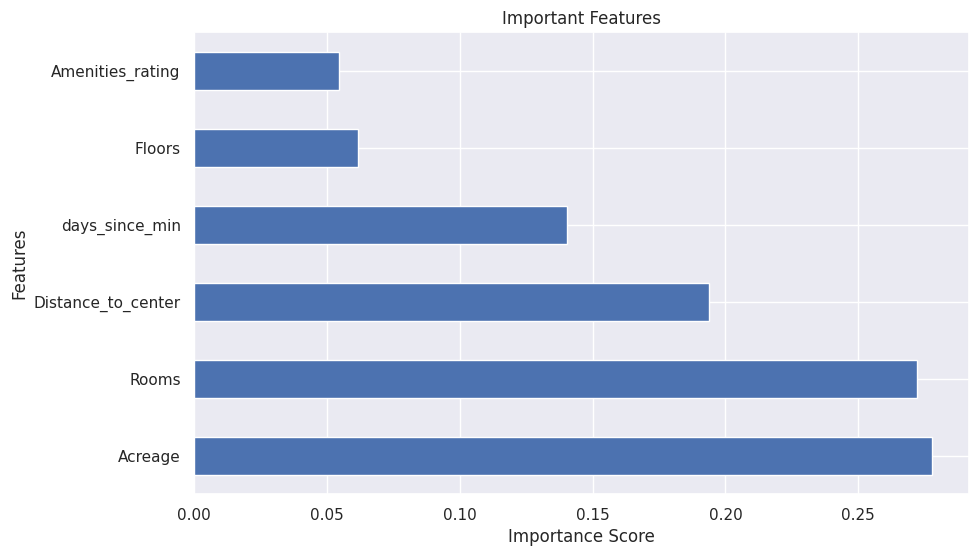

In [ ]:
best_rf_model = grid_search.best_estimator_

feature_importances = best_rf_model.feature_importances_

feature_importance = pd.Series(feature_importances, index=columns)

top_features = feature_importance.sort_values(ascending=False).head(15)


plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


##RandomForest From Scratch (Interface)

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

###Tổng Quan

>**Tổng quan:**

* Random Forests được biết đến như là các phương pháp học tổ hợp được sử dụng cho việc phân loại và hồi quy, nhưng trong trường hợp cụ thể này tôi sẽ tập trung vào phân loại.

* Random Forests về cơ bản là một tập hợp các cây quyết định mà mỗi cây được tạo trên một mẫu con của dữ liệu. Trong khi một cây cá nhân thường có nhiều nhiễu và dễ bị biến thiên cao, Random Forests tính trung bình từ kết quả của nhiều cây khác nhau, từ đó giảm thiểu biến thiên và đưa ra cho chúng ta một bộ phân loại mạnh mẽ.

* **Random forests là mô hình phi tham số (không có tham số) và yêu cầu ít hoặc không cần điều chỉnh tham số**. Chúng khác biệt với nhiều mô hình học máy thông thường được sử dụng ngày nay thường được tối ưu hóa bằng cách sử dụng gradient descent. Các mô hình như hồi quy tuyến tính, Support Vector Machine (SVM), mạng neural (Neural Network), v.v. yêu cầu nhiều phép toán dựa trên ma trận, trong khi các mô hình dựa trên cây như rừng ngẫu nhiên được xây dựng bằng số học cơ bản. Nói cách khác, để xây dựng một cây, chúng ta thực sự chỉ cần chọn một số quan sát từ tập dữ liệu của chúng ta, chọn một số đặc trưng để xem xét, và tìm giá trị tạo ra sự phân chia tốt nhất trong dữ liệu của chúng ta.

>**Decision Tree (Cây Quyết Định):**

* **Một cái nhìn tổng quan nhanh** nếu bạn không quen với cây quyết định nhị phân. Chúng ta bắt đầu từ đỉnh rất cao, mà chúng ta sẽ gọi là nút gốc, và đặt ra một câu hỏi đơn giản. Nếu câu trả lời cho câu hỏi đó đúng, chúng ta sẽ di chuyển đến nút bên trái kết nối trực tiếp bên dưới, mà chúng ta sẽ gọi là nút con bên trái, ngược lại, nếu câu trả lời sai, chúng ta sẽ di chuyển xuống nút bên phải, mà chúng ta sẽ gọi là nút con bên phải. Chúng ta sẽ lặp lại quá trình này cho đến khi chúng ta đạt được một trong những nút dưới cùng, còn được gọi là các nút cuối. Đối với phân loại, các nút cuối sẽ đưa ra lớp mà có tần suất xuất hiện nhiều nhất, trong khi trong bối cảnh hồi quy, chúng sẽ đưa ra dự đoán trung bình.

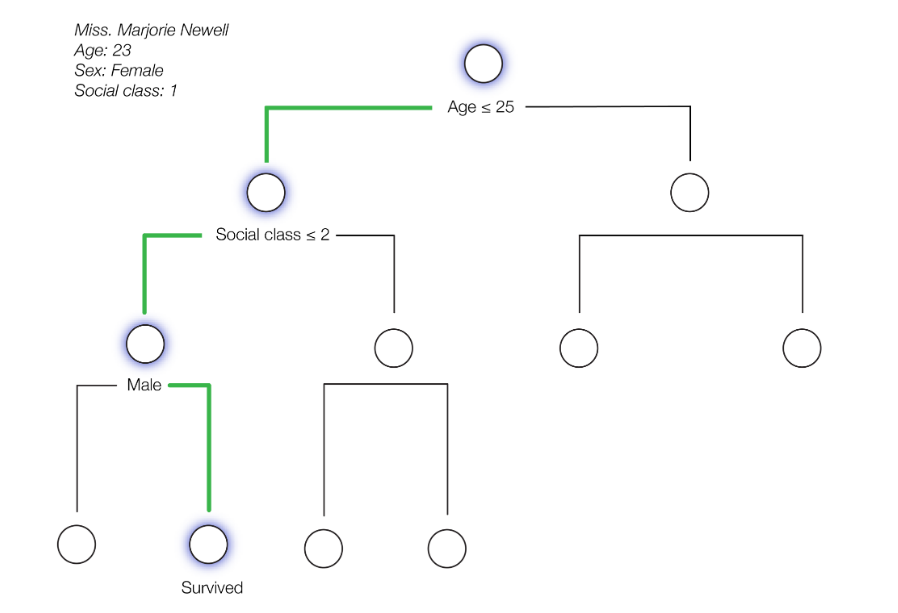

* Vấn đề khi dựa vào một cây đơn lẻ là nó cần rất nhiều độ sâu để có được sức mạnh dự đoán mạnh mẽ. Cây quyết định nhị phân có thể có kích thước lên đến \(2^{d+1} - 1\), trong đó \(d\) là độ sâu của cây, vì vậy ví dụ, một cây có độ sâu là 10 có thể đặt ra đến 2047 câu hỏi khác nhau. Điều này cuối cùng dẫn đến sự phức tạp rất lớn trong cây của chúng ta và trong thế giới học máy, độ phức tạp cao dẫn đến độ phương sai cao.

* **Cây quyết định có cái gọi là độ chệch thấp và độ phương sai cao**. Điều này có nghĩa là mô hình của chúng ta không nhất quán, nhưng **trung bình thì chính xác**. Hãy tưởng tượng một bảng phi tiêu đầy phi tiêu nằm rải rác khắp nơi, trượt trái và phải, tuy nhiên, nếu chúng ta trung bình chúng lại thành một phi tiêu duy nhất, chúng ta có thể đạt được một cú ném vào tâm. Mỗi cây riêng lẻ có thể được coi như những phi tiêu không chính xác và một rừng ngẫu nhiên sẽ mang lại cho chúng ta cú ném vào tâm đó.

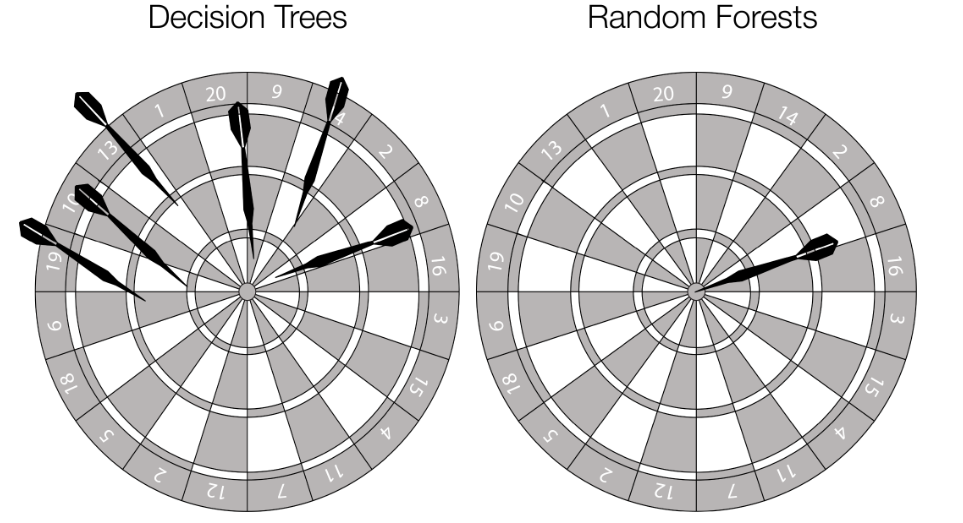

###Entropy

Các phép đo thường được sử dụng nhất để xây dựng cây quyết định nhị phân là: Entropy, Lỗi Phân loại (Classification Error), và Chỉ số Gini (Gini Index). Trong chủ đề này, chúng ta sẽ tập trung vào entropy, một phép đo sự không chắc chắn (đôi khi gọi là độ tạp) sử dụng công thức sau:

\[ H(X) = -\sum_j p_j \log p_j \]

trong đó \( p_j \) là xác suất của lớp \( j \).

Entropy tuân theo một cách diễn giải rất trực quan với các đặc tính sau:

- **Certainty (Chắc chắn)**: Entropy được tối thiểu hóa khi tất cả các mẫu trong một nút thuộc cùng một lớp sao cho \( P(X=1)=1 \) (trong trường hợp của chúng ta, mọi hành khách đều sống sót).
  \[ -1 \log_2 (1) - 0 \log_2 (0) = 0 \]
  
- **Uncertainty (Không chắc chắn)**: Entropy được tối đa hóa khi chúng ta có phân phối lớp đồng đều sao cho \( P(X=1) = 0.5 \) (trong trường hợp của chúng ta, mỗi hành khách có 50% cơ hội sống sót).
  \[ -0.5 \log_2 (0.5) - 0.5 \log_2 (0.5) = 0.5 + 0.5 = 1 \]

Khi chúng ta tìm kiếm một tập huấn luyện để chia, chúng ta sẽ muốn tìm một tập tối đa hóa entropy, nơi mà một nửa số hành khách sống sót và một nửa không, vì vậy chúng ta sẽ bắt đầu không chắc chắn. Khi chúng ta tìm kiếm một giá trị để chia, chúng ta sẽ muốn tối thiểu hóa entropy, để kết thúc càng chắc chắn càng tốt.

In [ ]:
def entropy(p):
    # Hàm tính entropy của xác suất p
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        # Tính entropy dựa trên công thức -p*log2(p) - (1-p)*log2(1-p)
        return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))


###Information Gain

Information Gain (Độ tăng Thông tin):
Information Gain đo lường mức độ thông tin chúng ta thu được khi chia một node tại một giá trị cụ thể. Công thức để tính Information Gain là:

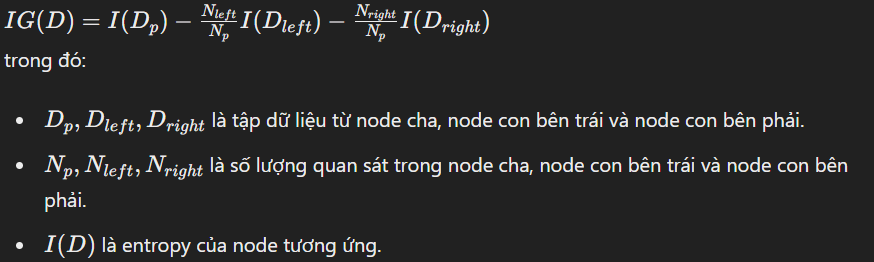

**Diễn giải công thức:**

**Information Gain = Entropy trước khi chia−Entropy sau khi chia**

Entropy trước khi chia là mức độ không chắc chắn của dữ liệu trước khi chúng ta thực hiện phép chia. Entropy sau khi chia là mức độ không chắc chắn của dữ liệu sau khi chia.

In [ ]:

def information_gain(left_child, right_child):
    # Hàm tính thông tin thu được từ việc phân chia dữ liệu thành left_child và right_child

    parent = left_child + right_child  # Kết hợp left_child và right_child để tạo thành tập dữ liệu ban đầu
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0  # Xác suất của lớp 1 trong tập parent
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0  # Xác suất của lớp 1 trong tập left_child
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0  # Xác suất của lớp 1 trong tập right_child

    IG_p = entropy(p_parent)  # Tính entropy của tập parent
    IG_l = entropy(p_left)  # Tính entropy của tập left_child
    IG_r = entropy(p_right)  # Tính entropy của tập right_child

    # Tính thông tin thu được bằng cách trừ đi entropy của các tập con (weighted sum) từ entropy của tập parent
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r


###Bootstrapping

**Ngẫu nhiên trong từng cây quyết định:**

>Một trong những lý do chính khiến rừng ngẫu nhiên (Random Forest) mạnh mẽ là do tính ngẫu nhiên được tiêm vào mỗi cây. Điều này có nghĩa là mỗi cây quyết định sẽ được xây dựng trên một tập dữ liệu con bootstrapped của dữ liệu gốc.

**Bootstrapping:**

>Nếu tập dữ liệu của chúng ta có
n quan sát, bootstrapping là quá trình lấy mẫu
n điểm với phép thay thế. Điều này có nghĩa là một số quan sát trong tập dữ liệu của chúng ta sẽ được chọn nhiều hơn một lần và một số sẽ không được chọn. Chúng ta có thể tính xác suất một quan sát bị bỏ qua trong tập dữ liệu bootstrapped là:   
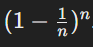

**Theo định nghĩa:**

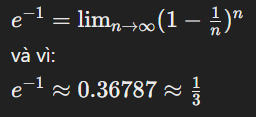

⇒ Bootstrapping n mẫu với phép thay thế sẽ bỏ qua khoảng 1/3 số quan sát trong mỗi cây riêng biệt. Vì mỗi cây chỉ được xây dựng với khoảng 2/3 dữ liệu, chúng ta sẽ thấy rằng hầu hết các cây sẽ khác nhau đáng kể.

**Out-of-Bag Error (Lỗi OOB):**

Một lợi ích khác của bootstrapping là chúng ta có được ước lượng lỗi out-of-bag (OOB) miễn phí. Các mẫu OOB là khoảng 1/3 các quan sát không được chọn để xây dựng một cây cụ thể. Sau khi xây dựng cây với các quan sát bootstrapped, chúng ta có thể kiểm tra mỗi **𝑥⃗𝑖** bị bỏ qua và tính toán lỗi dự đoán trung bình từ những mẫu đó. Chúng ta có thể tính toán điểm OOB cho mỗi cây và lấy trung bình của tất cả các điểm này để có được ước lượng về độ chính xác của rừng ngẫu nhiên. Điều này thực chất là dạng leave-one-out cross-validation. Nó cho chúng ta một ước lượng về độ chính xác của mô hình mà không cần phải thử nghiệm chính thức trên dữ liệu mới và chúng ta sẽ thấy rằng nó gần bằng với tỷ lệ lỗi khi thử nghiệm.

**Kết luận:**

Rừng ngẫu nhiên mạnh mẽ nhờ tính ngẫu nhiên trong quá trình xây dựng từng cây quyết định và lợi ích từ bootstrapping, như việc có được ước lượng lỗi OOB mà không cần thử nghiệm trên dữ liệu mới. Điều này giúp rừng ngẫu nhiên có khả năng tổng quát hóa tốt và độ chính xác cao.

In [ ]:
def draw_bootstrap(X_train, y_train):
    # Hàm lấy mẫu bootstrap từ tập dữ liệu huấn luyện

    X_train_df = pd.DataFrame(X_train)  # Chuyển X_train thành DataFrame
    # Lấy ngẫu nhiên các chỉ số từ 0 đến len(X_train)-1 với thay thế (replace=True)
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace=True))
    # Tìm các chỉ số không nằm trong bootstrap_indices để làm tập dữ liệu OOB (out-of-bag)
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    # Tạo tập dữ liệu bootstrap từ các chỉ số đã chọn
    X_bootstrap = X_train_df.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    # Tạo tập dữ liệu OOB từ các chỉ số còn lại
    X_oob = X_train_df.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    # Trả về tập dữ liệu bootstrap và OOB
    return X_bootstrap, y_bootstrap, X_oob, y_oob


def oob_score(tree, X_test, y_test):
    # Hàm tính toán lỗi OOB (out-of-bag error) cho cây quyết định

    mis_label = 0  # Đếm số lượng nhãn bị sai
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])  # Dự đoán nhãn cho từng mẫu trong X_test
        if pred != y_test[i]:  # Nếu nhãn dự đoán không khớp với nhãn thật
            mis_label += 1  # Tăng số lượng nhãn bị sai
    # Tính toán tỷ lệ lỗi OOB bằng cách chia số lượng nhãn bị sai cho tổng số mẫu
    return mis_label / len(X_test)


###Bagging

**Bagging (Bootstrap Aggregating):**

Bagging là quá trình trồng một cây mà mỗi node trong cây xem xét mọi giá trị trong mẫu bootstrapped cho từng đặc trưng để tìm ra phép chia tốt nhất tại node đó. Quá trình này được lặp lại cho tất cả các cây trong mô hình.

**Ý tưởng chính của Bagging:**

* Bootstrapping: Lấy mẫu ngẫu nhiên với thay thế từ tập dữ liệu gốc để tạo ra nhiều tập dữ liệu con.
* Xây dựng cây quyết định: Mỗi cây được xây dựng trên một trong các tập dữ liệu bootstrapped này, và mỗi node trong cây xem xét tất cả các giá trị của từng đặc trưng để tìm ra phép chia tốt nhất.

**Rừng Ngẫu nhiên (Random Forests):**

Rừng ngẫu nhiên áp dụng cùng một quy trình như bagging, nhưng với một điểm khác biệt quan trọng: trên một tập dữ liệu có 𝑝 đặc trưng, mỗi cây chỉ xem xét một tập con 𝑚 đặc trưng tại mỗi node, trong đó:   
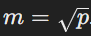

###find_split_point

**Để xây dựng hàm find_split_point, chúng ta sẽ thực hiện các bước sau:**

1. Chọn ngẫu nhiên m đặc trưng.
2. Đối với mỗi đặc trưng được chọn, lặp qua từng giá trị trong tập dữ liệu bootstrapped và tính toán độ tăng thông tin (information gain).
3. Trả về một dictionary chứa giá trị mang lại độ tăng thông tin cao nhất, đại diện cho một node trong cây.

**Mỗi node sẽ bao gồm:**

* Chỉ số của đặc trưng.
* Giá trị để chia tại đặc trưng đó.
* Node con bên trái.
* Node con bên phải.

In [ ]:
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    # Hàm tìm điểm chia tốt nhất trong tập dữ liệu bootstrap

    feature_ls = list()  # Danh sách các đặc trưng sẽ được xem xét
    num_features = len(X_bootstrap[0])  # Số lượng đặc trưng trong dữ liệu

    # Chọn ngẫu nhiên các đặc trưng để xem xét, tối đa là max_features đặc trưng
    while len(feature_ls) < max_features:
        feature_idx = random.sample(range(num_features), 1)[0]
        if feature_idx not in feature_ls:
            feature_ls.append(feature_idx)

    best_info_gain = -999  # Khởi tạo giá trị thông tin thu được tốt nhất
    node = None  # Biến lưu trữ node tốt nhất

    # Duyệt qua từng đặc trưng đã chọn
    for feature_idx in feature_ls:
        # Duyệt qua từng điểm chia trong đặc trưng
        for split_point in X_bootstrap[:, feature_idx]:
            left_child = {'X_bootstrap': [], 'y_bootstrap': []}  # Khởi tạo tập con trái
            right_child = {'X_bootstrap': [], 'y_bootstrap': []}  # Khởi tạo tập con phải

            # Kiểm tra loại dữ liệu của điểm chia để thực hiện chia đúng cách
            if isinstance(split_point, (int, float)):
                # Chia dữ liệu liên tục
                for i, value in enumerate(X_bootstrap[:, feature_idx]):
                    if value <= split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            else:
                # Chia dữ liệu phân loại
                for i, value in enumerate(X_bootstrap[:, feature_idx]):
                    if value == split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])

            # Tính toán thông tin thu được từ việc chia dữ liệu
            split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
            # Cập nhật điểm chia tốt nhất nếu thông tin thu được lớn hơn thông tin tốt nhất hiện tại
            if split_info_gain > best_info_gain:
                best_info_gain = split_info_gain
                left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                node = {'information_gain': split_info_gain,
                        'left_child': left_child,
                        'right_child': right_child,
                        'split_point': split_point,
                        'feature_idx': feature_idx}

    # Trả về node tốt nhất
    return node


###split_node

Hàm split_node sẽ quyết định khi nào dừng việc chia các nút trong cây và cuối cùng tạo ra một nút terminal (phân loại hành khách sống sót hoặc thiệt mạng).

**Hàm terminal_node:**

Trả về lớp phổ biến nhất tại node hiện tại.

**Hàm split_node:**

* Kiểm tra và quyết định khi nào dừng việc chia node.  
* Nếu đạt điều kiện dừng, tạo node cuối cùng.  
* Nếu không, tiếp tục chia node cho đến khi đạt điều kiện dừng.

**KẾT LUẬN:**
Hàm **find_split_point** và **split_node** giúp xây dựng cây quyết định trong mô hình rừng ngẫu nhiên, tối ưu hóa việc chia dữ liệu dựa trên độ tăng thông tin và đảm bảo rằng mỗi node con được chia một cách hiệu quả và chính xác.

In [ ]:
def terminal_node(node):
    # Hàm tạo node lá (terminal node) dựa trên nhãn của các mẫu trong node đó

    y_bootstrap = node['y_bootstrap']
    # Chọn nhãn dự đoán là nhãn xuất hiện nhiều nhất trong các nhãn của node
    pred = max(y_bootstrap, key=y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):
    # Hàm chia node dựa trên các tham số và độ sâu hiện tại của cây

    left_child = node['left_child']
    right_child = node['right_child']

    # Xóa các node con sau khi chia
    del(node['left_child'])
    del(node['right_child'])

    # Kiểm tra nếu một trong hai node con không có mẫu nào
    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    # Kiểm tra nếu độ sâu hiện tại đã đạt đến độ sâu tối đa
    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    # Chia node con trái nếu số lượng mẫu nhỏ hơn hoặc bằng min_samples_split
    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_features, min_samples_split, max_depth, depth + 1)

    # Chia node con phải nếu số lượng mẫu nhỏ hơn hoặc bằng min_samples_split
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)


###build_tree & random_forest

**Hàm build_tree:**

* Xây dựng cây quyết định từ tập dữ liệu bootstrapped.
* Sử dụng **find_split_point** và **split_node** để xây dựng cây quyết định.

**Các tham số chính của rừng ngẫu nhiên:**

* n_estimators: Số lượng cây trong rừng.  
* max_features: Số lượng đặc trưng được xem xét khi tìm kiếm điểm chia tốt nhất (thường là 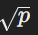).  
* max_depth: Độ sâu tối đa của cây.  
* min_samples_split: Số lượng mẫu tối thiểu cần thiết để chia một node nội bộ.

**Quy trình xây dựng cây đơn lẻ:**

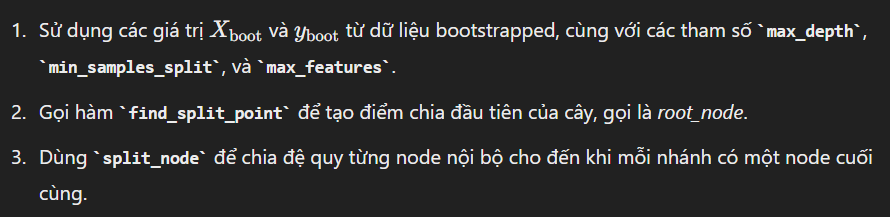

**Xây dựng rừng ngẫu nhiên:**

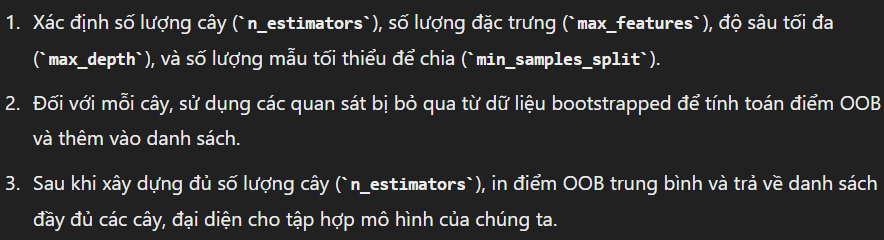

In [ ]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    # Hàm xây dựng cây quyết định từ dữ liệu bootstrap
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node


def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    # Hàm xây dựng rừng ngẫu nhiên từ dữ liệu huấn luyện

    tree_ls = list()  # Danh sách các cây trong rừng
    oob_ls = list()  # Danh sách các lỗi OOB

    for i in range(n_estimators):
        # Lấy mẫu bootstrap và OOB
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)

        # Xây dựng cây từ dữ liệu bootstrap
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, min_samples_split, max_depth)

        # Thêm cây vào danh sách các cây
        tree_ls.append(tree)

        # Tính toán lỗi OOB cho cây và thêm vào danh sách lỗi OOB
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)

    # In ra ước tính lỗi OOB trung bình
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))

    return tree_ls


###predict_tree & predict_forest

Hàm predict_tree sẽ dự đoán lớp của một vector đầu vào
𝑥𝑖
⃗dựa trên một cây đơn lẻ. Vì một cây đơn lẻ được cấu trúc dưới dạng các từ điển lồng nhau, đại diện cho từng node, chúng ta sẽ cho
𝑥𝑖
⃗ đi qua cây bằng cách liên tục kiểm tra xem điểm chia hiện tại có chứa từ điển khác (node) hay không. Khi chúng ta đạt đến left_split hoặc right_split không chứa từ điển nào, chúng ta đã đạt đến node cuối cùng và có thể trả về lớp.

**Hàm predict_tree:**

* Duyệt qua cây đơn lẻ tree để dự đoán lớp cho vector đầu vào x.
* Bắt đầu từ node gốc, kiểm tra giá trị của đặc trưng tại node hiện tại và quyết định đi sang node trái hay phải.
* Khi đến node cuối cùng, trả về lớp dự đoán được lưu trong `node['terminal']`.

In [ ]:
def predict_tree(tree, X_test):
    # Hàm dự đoán nhãn của một mẫu dựa trên cây quyết định

    feature_idx = tree['feature_idx']  # Lấy chỉ số đặc trưng dùng để chia

    # Kiểm tra giá trị của đặc trưng tại mẫu X_test để quyết định đi tiếp đến node con trái hoặc phải
    if X_test[feature_idx] <= tree['split_point']:
        # Nếu giá trị đặc trưng nhỏ hơn hoặc bằng điểm chia, tiếp tục xuống cây con bên trái
        if isinstance(tree['left_split'], dict):
            return predict_tree(tree['left_split'], X_test)  # Đệ quy xuống node con trái
        else:
            return tree['left_split']  # Nếu node con trái là node lá, trả về giá trị dự đoán
    else:
        # Nếu giá trị đặc trưng lớn hơn điểm chia, tiếp tục xuống cây con bên phải
        if isinstance(tree['right_split'], dict):
            return predict_tree(tree['right_split'], X_test)  # Đệ quy xuống node con phải
        else:
            return tree['right_split']  # Nếu node con phải là node lá, trả về giá trị dự đoán


**Hàm predict_forest:**

* Dự đoán lớp của tập dữ liệu đầu vào X dựa trên rừng ngẫu nhiên forest.
* Lặp qua từng cây trong rừng và dự đoán lớp cho từng mẫu trong X.
* Tổng hợp các dự đoán từ tất cả các cây cho từng mẫu và chọn lớp phổ biến nhất làm lớp cuối cùng.

In [ ]:
def predict_rf(tree_ls, X_test):
    # Hàm dự đoán nhãn của tập mẫu dựa trên rừng ngẫu nhiên
    pred_ls = list()  # Danh sách lưu các dự đoán cuối cùng cho từng mẫu trong X_test

    for i in range(len(X_test)):
        # Dự đoán nhãn của mẫu X_test thứ i bởi tất cả các cây trong rừng
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]

        # Chọn nhãn có số lần xuất hiện nhiều nhất (đa số) làm nhãn cuối cùng
        final_pred = max(ensemble_preds, key=ensemble_preds.count)

        # Thêm nhãn cuối cùng vào danh sách kết quả
        pred_ls.append(final_pred)

    return np.array(pred_ls)  # Trả về kết quả dự đoán dưới dạng numpy array


In [ ]:
'''
# Số lượng cây trong rừng ngẫu nhiên
n_estimators = 150

# Số lượng đặc trưng tối đa được chọn tại mỗi node
max_features = 'sqrt'

# Độ sâu tối đa của mỗi cây
max_depth = 15

# Số lượng mẫu tối thiểu cần có để tách node
min_samples_split = 17

# Xây dựng mô hình rừng ngẫu nhiên dựa trên dữ liệu huấn luyện
model = random_forest(X_RF_train, y_RF_train, n_estimators, max_features, max_depth, min_samples_split)

# Dự đoán nhãn cho tập dữ liệu kiểm tra
preds = predict_rf(model, X_RF_test)

# Tính toán độ chính xác của mô hình trên tập dữ liệu kiểm tra
acc = sum(preds == y_RF_test) / len(y_RF_test)
print("Testing accuracy: {:.3f}".format(acc))
'''

'\n# Số lượng cây trong rừng ngẫu nhiên\nn_estimators = 150\n\n# Số lượng đặc trưng tối đa được chọn tại mỗi node\nmax_features = \'sqrt\'\n\n# Độ sâu tối đa của mỗi cây\nmax_depth = 15\n\n# Số lượng mẫu tối thiểu cần có để tách node\nmin_samples_split = 17\n\n# Xây dựng mô hình rừng ngẫu nhiên dựa trên dữ liệu huấn luyện\nmodel = random_forest(X_RF_train, y_RF_train, n_estimators, max_features, max_depth, min_samples_split)\n\n# Dự đoán nhãn cho tập dữ liệu kiểm tra\npreds = predict_rf(model, X_RF_test)\n\n# Tính toán độ chính xác của mô hình trên tập dữ liệu kiểm tra\nacc = sum(preds == y_RF_test) / len(y_RF_test)\nprint("Testing accuracy: {:.3f}".format(acc))\n'

##Performance

 **Lý do chọn các metrics MAE, MSE:**

* **Mean Absolute Error (MAE):**
  * MAE đo lường giá trị trung bình của các sai số tuyệt đối giữa giá trị thực tế và giá trị dự đoán. MAE cho biết sai số dự đoán trung bình của mô hình mà không quan tâm đến hướng của sai số.
  * MAE dễ hiểu và trực quan, giúp dễ dàng diễn giải và so sánh mức độ sai số giữa các mô hình khác nhau.

* **Mean Squared Error (MSE):**
  * MSE đo lường giá trị trung bình của bình phương các sai số giữa giá trị thực tế và giá trị dự đoán. MSE nhấn mạnh các sai số lớn hơn do việc bình phương sai số.
  * MSE hữu ích trong việc đánh giá mô hình khi muốn tập trung vào việc giảm thiểu các sai số lớn và khi việc có các dự đoán lớn hơn cần được đặc biệt quan tâm.


**Lý do không nên đưa R² vào để so sánh:**

* **Không phù hợp với dữ liệu phi tuyến tính hoặc phức tạp**:
  * Với các mô hình phi tuyến tính hoặc phức tạp như XGBoost và Random Forest, R² có thể không phản ánh đúng khả năng dự báo của mô hình vì nó chủ yếu phù hợp với các mô hình tuyến tính.
  * Khi dữ liệu không tuyến tính, R² có thể đưa ra những kết quả không chính xác hoặc gây hiểu lầm.

**Nhóm sẽ không đưa Lasso và Ridge vào phần performance bởi vì original Linear Regression trong trường hợp này đã có hiệu suất tương đương với Lasso và Ridge, do các biến đầu vào có tương quan thấp với nhau và trọng số mô hình không bị quá phức tạp.**

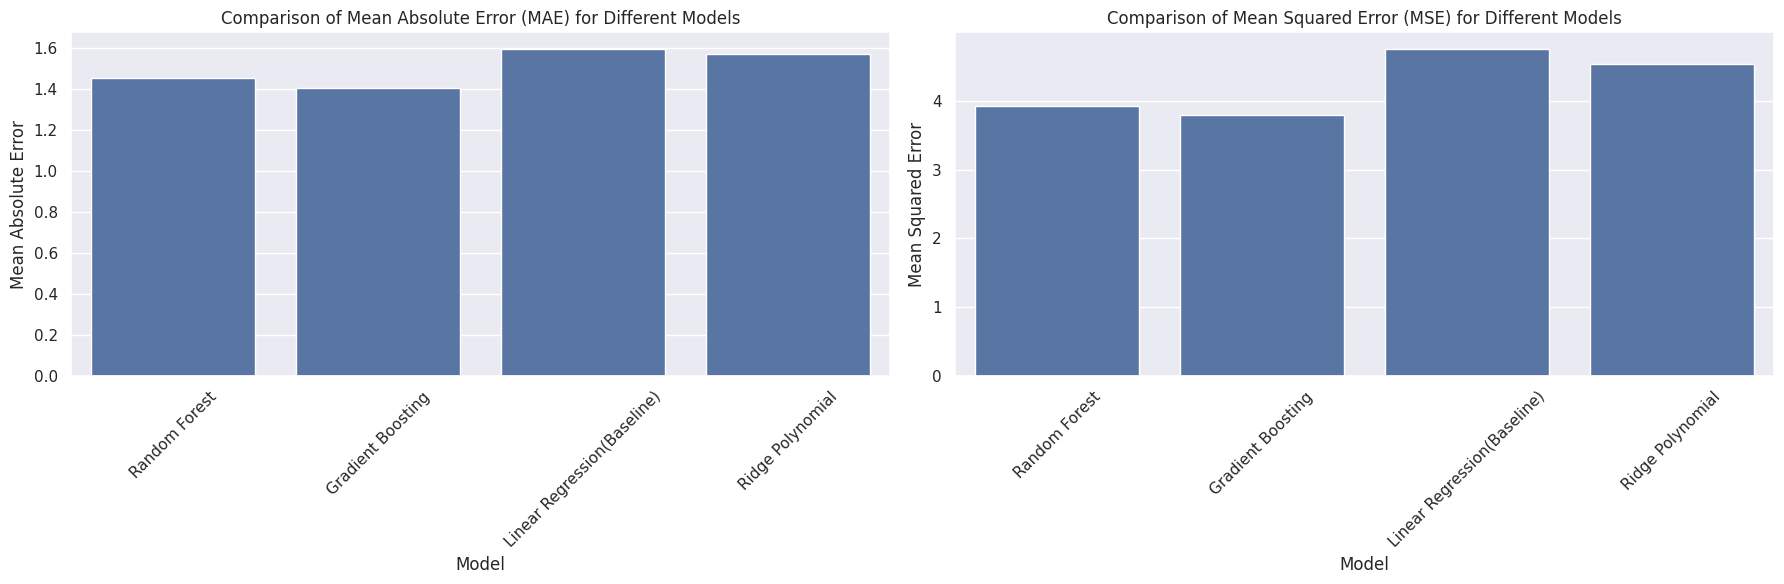

In [ ]:
# Giá trị MAE của các mô hình
mae_values = {
    'Random Forest': MAE_RF,
    'Gradient Boosting': mae_GB_test,
    'Linear Regression(Baseline)': mae_LNR,
    'Ridge Polynomial': mae_Ridge_poly
}

# Giá trị MSE của các mô hình
mse_values = {
    'Random Forest': MSE_RF,
    'Gradient Boosting': mse_GB_test,
    'Linear Regression(Baseline)': mse_LNR,
    'Ridge Polynomial': mse_Ridge_poly
}

# Chuyển đổi từ từ điển sang DataFrame để dễ vẽ biểu đồ
mae_df = pd.DataFrame(list(mae_values.items()), columns=['Model', 'MAE'])
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])

# Tạo subplot với 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=mae_df)
axes[0].set_title('Comparison of Mean Absolute Error (MAE) for Different Models')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_xlabel('Model')
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ MSE
sns.barplot(ax=axes[1], x='Model', y='MSE', data=mse_df)
axes[1].set_title('Comparison of Mean Squared Error (MSE) for Different Models')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



In [ ]:
mae_df

,Model,MAE
0,Random Forest,1.452257
1,Gradient Boosting,1.403605
2,Linear Regression(Baseline),1.595629
3,Ridge Polynomial,1.568201


In [ ]:
mse_df

,Model,MSE
0,Random Forest,3.929715
1,Gradient Boosting,3.794622
2,Linear Regression(Baseline),4.757181
3,Ridge Polynomial,4.531281


## Model - evaluation

### **1. Gradient Boosting**

- **MAE:** 1.403605
- **MSE:** 3.794622

**Nhận định:**
- Gradient Boosting có MAE và MSE thấp nhất trong số các mô hình đã so sánh, cho thấy đây là mô hình tốt nhất cho tập dữ liệu này.
- MAE và MSE thấp chứng tỏ rằng mô hình này không chỉ dự đoán chính xác hơn mà còn có ít sai số lớn trong dự đoán.



### **2. Random Forest**

- **MAE:** 1.444086
- **MSE:** 3.901233

**Nhận định:**
- Random Forest có MAE và MSE cao hơn so với Gradient Boosting nhưng vẫn tốt hơn so với các mô hình còn lại.
- Random Forest là mô hình thứ hai tốt nhất trong số các mô hình đã thử nghiệm, và có hiệu suất gần với Gradient Boosting.



### **3. Linear Regression (Baseline)**

- **MAE:** 1.595629
- **MSE:** 4.757181

**Nhận định:**
- Linear Regression có MAE và MSE cao nhất, cho thấy mô hình này có hiệu suất kém nhất.
- Kết quả này có thể được sử dụng làm baseline để so sánh với các mô hình phức tạp hơn.
- Hiệu suất kém có thể do Linear Regression không thể bắt kịp các mẫu phức tạp trong dữ liệu.



### **4. Ridge Polynomial Regression**

- **MAE:** 1.568201
- **MSE:** 4.531281

**Nhận định:**
- Ridge Polynomial Regression có MAE và MSE thấp hơn Linear Regression, nhưng vẫn cao hơn so với Random Forest và Gradient Boosting.
- Việc áp dụng Ridge Polynomial giúp cải thiện hiệu suất so với Linear Regression nhưng không thể vượt qua các mô hình phi tuyến tính phức tạp hơn như Random Forest và Gradient Boosting.
- Điều này cho thấy rằng việc thêm đa thức vào mô hình hồi quy tuyến tính có thể giúp cải thiện độ chính xác, nhưng không nhiều như các mô hình phi tuyến tính phức tạp hơn.



### **5. Tổng quan**

- **Gradient Boosting**: Hiệu suất tốt nhất, nên được sử dụng cho các dự đoán chính xác nhất.
- **Random Forest**: Cũng rất hiệu quả và có thể là lựa chọn tốt nếu muốn một mô hình dễ giải thích hơn so với Gradient Boosting.
- **Linear Regression**: Hiệu suất kém nhất, chỉ nên dùng làm baseline.
- **Ridge Polynomial Regression**: Cải thiện hơn so với Linear Regression, nhưng không tốt bằng Random Forest và Gradient Boosting.<br>


### **6. Mô hình mạnh nhất:**

=> **Gradient Boosting là mô hình tốt nhất cho tập dữ liệu này, trong khi Random Forest cũng là một lựa chọn khả thi với hiệu suất gần tương đương. Các mô hình tuyến tính như Linear Regression và Ridge Polynomial Regression có hiệu suất kém hơn đáng kể.**

In [ ]:
import joblib
joblib.dump(best_model, 'best_gb_model.pkl')

['best_gb_model.pkl']

**Đoạn mã trên được dùng để lưu lại mô hình tốt nhất với các thông số đã được tuning để có thể triển khai lên ứng dụng**

# **Final Report**

## 1. Đặt vấn đề



### 1.1 Giới thiệu
Trong bối cảnh thị trường bất động sản ngày càng phát triển, việc dự đoán giá nhà trở thành một yếu tố quan trọng không chỉ đối với các nhà đầu tư mà còn với người mua và bán nhà. Giá nhà bị ảnh hưởng bởi nhiều yếu tố như vị trí địa lý, diện tích, số phòng, tiện ích xung quanh, và nhiều yếu tố khác. Dự đoán chính xác giá nhà có thể giúp các bên liên quan đưa ra các quyết định tài chính hợp lý, giảm thiểu rủi ro và tối ưu hóa lợi nhuận. Vì vậy, nhóm chúng tôi đã chọn dự án "Dự đoán giá nhà" với mục tiêu xây dựng một mô hình dự đoán giá nhà dựa trên các yếu tố liên quan.



### 1.2 Lý do chọn đề tài
- **Tính thực tiễn:** Giá nhà là một trong những thông tin quan trọng nhất trong thị trường bất động sản. Việc dự đoán chính xác giá nhà có thể giúp người mua, người bán và các nhà đầu tư đưa ra quyết định chính xác hơn.
- **Ứng dụng của công nghệ:** Sự phát triển của trí tuệ nhân tạo và học máy cho phép chúng ta xây dựng các mô hình dự đoán chính xác và hiệu quả hơn. Đây là cơ hội để ứng dụng các công nghệ mới vào giải quyết các vấn đề thực tiễn.
- **Nhu cầu của thị trường:** Thị trường bất động sản luôn có nhu cầu cao về các công cụ hỗ trợ quyết định giá cả. Một mô hình dự đoán giá nhà chính xác sẽ có giá trị lớn đối với cả người dùng cá nhân và doanh nghiệp.
- **Kỹ năng và kiến thức:** Dự án này cung cấp cơ hội để nhóm chúng tôi áp dụng và nâng cao các kỹ năng về phân tích dữ liệu, lập trình và học máy, cũng như kiến thức về thị trường bất động sản.



## 2. Triển khai





### 2.1 Data Collection


#### 2.1.1 Các mô hình LLM được anyscale hỗ trợ.
1. **codellama/CodeLlama-70b-Instruct-hf:**
   - **Mô tả:** CodeLlama là một mô hình ngôn ngữ lớn được thiết kế để xử lý và tạo mã nguồn. Phiên bản này có khả năng xử lý các tác vụ liên quan đến mã lập trình với độ chính xác cao.
   - **Đặc điểm:**
     - Số lượng tham số: 70 tỷ.
     - Được tối ưu hóa để tạo mã và hiểu các ngôn ngữ lập trình khác nhau.
     - Hỗ trợ nhiều ngôn ngữ lập trình phổ biến như Python, JavaScript, C++, v.v.

2. **google/gemma-7b-it:**
   - **Mô tả:** Gemma là một mô hình ngôn ngữ lớn được tối ưu hóa cho các tác vụ ngôn ngữ tiếng Ý.
   - **Đặc điểm:**
     - Số lượng tham số: 7 tỷ.
     - Được huấn luyện trên một tập dữ liệu lớn gồm các văn bản tiếng Ý, cung cấp khả năng hiểu và tạo ngôn ngữ tự nhiên tiếng Ý chính xác.

3. **llava-hf/llava-v1.6-mistral-7b-hf:**
   - **Mô tả:** LLaVA là một mô hình ngôn ngữ lớn kết hợp với khả năng xử lý hình ảnh, cho phép thực hiện các tác vụ như mô tả hình ảnh và hiểu ngữ cảnh từ hình ảnh.
   - **Đặc điểm:**
     - Số lượng tham số: 7 tỷ.
     - Được huấn luyện để kết hợp thông tin từ văn bản và hình ảnh, cung cấp khả năng hiểu ngữ cảnh đa phương tiện.

4. **meta-llama/Meta-Llama-3-70B-Instruct:**
   - **Mô tả:** Đây là phiên bản lớn nhất và tiên tiến nhất của dòng Meta-Llama-3, được thiết kế để làm theo các hướng dẫn cụ thể với độ chính xác cao.
   - **Đặc điểm:**
     - Số lượng tham số: 70 tỷ.
     - Được tinh chỉnh để thực hiện các nhiệm vụ theo yêu cầu với hiệu suất cao, phù hợp cho các ứng dụng phức tạp đòi hỏi sự chính xác và linh hoạt.

5. **meta-llama/Meta-Llama-3-8B-Instruct:**
   - **Mô tả:** Mô hình này được tinh chỉnh để làm theo các hướng dẫn cụ thể, phù hợp cho các tác vụ yêu cầu thực hiện các nhiệm vụ theo yêu cầu.
   - **Đặc điểm:**
     - Số lượng tham số: 8 tỷ.
     - Cung cấp khả năng thực hiện các nhiệm vụ theo hướng dẫn với độ chính xác cao, thích hợp cho nhiều ứng dụng khác nhau.

6. **mistralai/Mistral-7B-Instruct-v0.1:**
   - **Mô tả:** Mô hình này được tối ưu hóa cho các tác vụ hướng dẫn, giúp thực hiện các nhiệm vụ theo yêu cầu cụ thể.
   - **Đặc điểm:**
     - Số lượng tham số: 7 tỷ.
     - Được tinh chỉnh để cung cấp hiệu suất cao trong việc thực hiện các nhiệm vụ dựa trên hướng dẫn.

7. **mistralai/Mixtral-8x22B-Instruct-v0.1:**
   - **Mô tả:** Đây là một mô hình rất lớn, được thiết kế để kết hợp nhiều mô hình nhỏ hơn (8x22B), nhằm tối ưu hóa khả năng xử lý ngôn ngữ tự nhiên với độ chính xác cao.
   - **Đặc điểm:**
     - Số lượng tham số: 176 tỷ (8 mô hình mỗi mô hình 22 tỷ tham số).
     - Cung cấp khả năng xử lý các nhiệm vụ phức tạp với hiệu suất cao.

8. **mistralai/Mixtral-8x7B-Instruct-v0.1:**
   - **Mô tả:** Tương tự như mô hình trên, nhưng có kích thước nhỏ hơn, được thiết kế để kết hợp nhiều mô hình 7B.
   - **Đặc điểm:**
     - Số lượng tham số: 56 tỷ (8 mô hình mỗi mô hình 7 tỷ tham số).
     - Tối ưu cho các nhiệm vụ xử lý ngôn ngữ tự nhiên yêu cầu độ chính xác và khả năng xử lý cao.

9. **mlabonne/NeuralHermes-2.5-Mistral-7B:**
   - **Mô tả:** NeuralHermes là một mô hình ngôn ngữ lớn, tối ưu cho các tác vụ liên quan đến giao tiếp và phân tích văn bản.
   - **Đặc điểm:**
     - Số lượng tham số: 7 tỷ.
     - Cung cấp khả năng phân tích và hiểu ngôn ngữ tự nhiên, thích hợp cho các ứng dụng phân tích văn bản và giao tiếp.



#### 2.1.2 LLM được sử dụng: Meta-llma/Meta-Llama-3-70B-Instruct.

**ĐẶC ĐIỂM MÔ HÌNH**

- **Khả năng hiểu ngữ cảnh và xử lý ngôn ngữ tự nhiên:**
  - Nếu bài toán dự đoán giá nhà yêu cầu xử lý và phân tích các mô tả bằng văn bản, bình luận, đánh giá hoặc dữ liệu phi cấu trúc khác, Meta-LLaMA-3-70B-Instruct có thể rất hữu ích. Ví dụ, mô hình có thể trích xuất thông tin quan trọng từ mô tả của các ngôi nhà hoặc đánh giá của người dùng.

- **Khả năng tùy chỉnh và làm theo hướng dẫn cụ thể:**
  - Mô hình Instruct được huấn luyện để thực hiện các tác vụ theo hướng dẫn cụ thể, giúp dễ dàng điều chỉnh để thực hiện các nhiệm vụ phân tích dữ liệu phức tạp theo yêu cầu.

- **Hiệu suất mạnh mẽ trên nhiều nhiệm vụ khác nhau:**
  - Meta-LLaMA-3-70B-Instruct có khả năng học và tổng quát hóa tốt trên nhiều loại nhiệm vụ khác nhau, có thể mang lại lợi ích nếu bài toán dự đoán giá nhà cần tích hợp với nhiều nguồn dữ liệu khác nhau.

**TÍNH PHÙ HỢP**

- **Kết hợp với mô hình truyền thống:**
  - Sử dụng Meta-LLaMA-3-70B-Instruct để xử lý và trích xuất thông tin từ các dữ liệu phi cấu trúc như mô tả bất động sản, bình luận của người dùng, tin tức về thị trường nhà đất, sau đó sử dụng các thông tin này làm đầu vào cho các mô hình truyền thống như Gradient Boosting hoặc Random Forest.

- **Feature Engineering:**
  - Dùng Meta-LLaMA-3-70B-Instruct để tạo ra các đặc trưng mới từ văn bản, chẳng hạn như đánh giá mức độ tiện ích của khu vực dựa trên mô tả, phân loại chất lượng nhà dựa trên các tiêu chí được mô tả trong dữ liệu.

- **Phân tích và hiểu biết thị trường:**
  - Mô hình có thể phân tích dữ liệu lịch sử và hiện tại từ nhiều nguồn để tạo ra báo cáo và dự đoán về xu hướng thị trường nhà đất, giúp cải thiện chất lượng dự đoán giá nhà.

**Nhận xét:**

- Trong quá trình lựa chọn mô hình phù hợp nhất cho nhiệm vụ cụ thể, cần cân nhắc giữa hiệu suất tổng thể và khả năng thực hiện nhiệm vụ theo hướng dẫn cụ thể.

- **mistralai/Mixtral-8x22B-Instruct-v0.1** là mô hình có quy mô lớn nhất với 176 tỷ tham số, mang lại hiệu suất cao nhất cho các tác vụ phức tạp. Tuy nhiên, sức mạnh và độ chính xác cao của mô hình này đi kèm với hạn chế trong việc tối ưu hóa cho các nhiệm vụ theo hướng dẫn cụ thể. Điều này có thể dẫn đến việc đầu ra không đúng định dạng mong muốn, gây khó khăn trong việc xử lý dữ liệu đầu ra từ các mô hình LLM.

- Ngược lại, **Meta-Llama-3-70B-Instruct** với 70 tỷ tham số đã được tinh chỉnh để làm theo các hướng dẫn cụ thể với độ chính xác cao. Mặc dù quy mô nhỏ hơn so với Mixtral-8x22B, mô hình này lại phù hợp hơn cho các ứng dụng yêu cầu sự chính xác và linh hoạt trong việc thực hiện các nhiệm vụ theo hướng dẫn. Điều này đặc biệt quan trọng trong các tác vụ trích xuất thêm các tính năng từ dữ liệu thô, nơi mà độ chính xác và tuân thủ định dạng là yếu tố ưu tiên.

Do đó, nhóm quyết định chọn **Meta-Llama-3-70B-Instruct** để đảm bảo rằng các nhiệm vụ theo hướng dẫn được thực hiện một cách chính xác và hiệu quả nhất, đồng thời giảm thiểu rủi ro lỗi định dạng đầu ra so với việc sử dụng các mô hình có quy mô lớn hơn nhưng không được tối ưu hóa cho nhiệm vụ này.




####2.1.3 Công cụ sử dụng để lấy dữ liệu: Selenium
- Selenium được nhóm lựa chọn vì nó mang tính linh động cao, có thể lấy được dữ liệu từ các trang web phức tạp khác nhau, mặc dù trang web chứa nguồn data là 1 trang web tĩnh nên việc sử dụng Selenium có thể không phải là tối ưu nhất trong trường hợp này. Nhưng vì có thể sử dụng cho nhiều mục đích khác nhau trong project nên nhóm vẫn quyết định dùng Selenium làm công cụ chính để lấy data.

- Cụ thể: Selenium đã được dùng lại 1 lần nữa để build 1 tool geocode cho các biến "Address","city/province" và "district" do hạn chế của API và hiệu suất trả ra của nó không cao.




####2.1.4 Các biến sơ cấp ban đầu lấy được trên web gồm có:
- **Giá** (Price)
- **Diện tích** (Area)
- **Số phòng ngủ** (Bedrooms)
- **Số phòng tắm** (Bathrooms)
- **Mã số tin đăng** (Listing ID)
- **Ngày đăng** (Date Posted)
- **Số điện thoại** (Phone Number)
- **Quận/Huyện** (district)
- **Thành phố/Tỉnh** (city/province)
- **Tiêu đề** (Title)
- **desciption** (Description)

- Trong đó các biến như " Diện tích ", "Số phòng ngủ", "Số phòng tắm", "Ngày đăng" được nằm cùng trong 1 ul list vì thế phải dùng regex để trích xuất từ text nằm bên trong list ấy. Vì đây là 1 danh sách không có thứ tự nên việc sử dụng regex để trích xuất là hoàn hợp lí.

- Các biến còn lại có thể truy suất vào dễ dàng hơn.

- Biến description cũng được nhóm truy xuất vào để lấy raw text, nhưng trong quá trình crawling nó đã được xử lí song song với LLM để tạo ra thêm 8 biến mới ở phần sau, Nên việc lưu về description không thật sự cần thiết nữa.



#### 2.1.5 Các Biến Mới Tạo
- **Địa chỉ** (DiaChi)
- **Tiện ích** (TienIch)
- **Số tầng** (SoTang)
- **Gần trường học** (NearSchool)
- **Gần bệnh viện** (NearHospital)
- **An ninh** (Security)
- **Tính pháp lý rõ ràng** (LegalClarity)
- **Sell House** (biến phân loại để chỉ ra "Có đang bán nhà hay không")

- Thông qua việc sử dụng LLM nhóm đã có thể trích xuất ra được thêm 8 biến với hiệu suất khá tốt mà không bị quá nhiều null khi trích xuất.



#### 2.1.6 Các vấn đề:
1. Vấn đề đầu tiên gặp phải chính là việc LLM vẫn có thể trả sai kết quả dẫn đến việc JsonDecode bị lỗi và không trích xuất được dữ liệu.
- **Giải pháp: cho LLM được chạy nhiều lần để nó có thể trả ra đúng định dạng, nếu nó không trả ra đúng định dạng sau 5 lần lặp sẽ cho nó trả về 1 giá trị mặc định.**
- **Hiệu quả mang lại: sau khi thu về bộ data nhận thấy rằng không có quá nhiều null ở các biến được tạo thêm.**
2. Vấn đề thứ hai gặp phải đó chính là khi nhóm tiến hành khám phá trang web đã nhận thấy các thuộc tính không được cố định(sẽ có những bài đăng có thuộc tính này mà không có thuộc tính kia).
- **Giải pháp: chọn ra các biến số quan trọng cần có của 1 bài đăng, cụ thể các biến đó là "Diện tích", "Phòng ngủ", "Phòng WC", "Mã tin" nằm trong list không có thứ tự. Trước đó cũng sẽ được lọc 1 lần với các biến nền tảng khác như "phone","Giá","Title","district","city/province","description".**
- **Hiệu quả mang lại: Bộ data được thu về trở nên đáng tin cậy hơn với các biến số được lấy trực tiếp từ các bài đăng mà không bị null.**
3. Vấn đề thứ ba gặp phải là khi có bộ data thì có những bài đăng trên web bán nhà nhưng không thật sự đang bán nhà mà lại làm các dịch vụ khác.
- **Giải pháp: Tạo thêm 1 biến phân loại từ LLM để việc loại bỏ các bài đăng đó trở nên dễ dàng hơn khi Preprocess, cụ thể dùng hàm Predict_SellHouse để thực hiện. Cụ thể LLM sẽ nhận được 1 chuỗi nối từ các biến "Address", "Title", "Price" để tiến hành phân loại.**
- **Hiệu quả mang lại: Loại bỏ được các bài đăng "nhiễu" không thật sự đang bán nhà mà làm dịch vụ khác.**



#### 2.1.7 Kết quả:
- Kết thúc phần Data Collection, nhóm thu về được 9317 data sample với lượng null rất nhỏ và các sample đều đạt điều kiện đầu vào.



#### 2.1.8 Đánh giá:
- Trong phần Data Collection này nhóm đã thu được 1 bộ data đáng tin cậy, phong phú và đa dạng. Việc sử dụng Selenium kết hợp với trích xuất đặc trưng từ LLM giúp chúng tôi tự động hóa quy trình thu thập dữ liệu, đảm bảo dữ liệu đầy đủ và kịp thời. Với dữ liệu và mô hình hiện có, nhóm đã có thể đến bước tiếp theo để Preprocessing.

### 2.2 Data Preprocessing and Feature Engineering



####Tổng quan

> Trước khi thực hiện đến các giai đoạn Exploration (hay EDA), Preprocessing và bao gồm Feature Engineering thì việc đầu tiên sẽ là Đánh giá lại cái nhìn tổng quan về dữ liệu đã thu thập.  
* Nêu lên những quan sát tổng quan về dữ liệu thô ban đầu.
* Diễn giải những vấn đề gặp phải trong quá trình Collection, và các phương pháp giải quyết để có thể thu thập được bộ dữ liệu thô ban đầu. (**Selective Web Scraping, Sampling Methods,...**)
* Xác định rõ mục tiêu của dự án của nhóm (**Dự đoán giá nhà bán ở khu vực Thành Phố Hồ Chí Minh**) và định hướng các bước tiếp theo.




Xem chi tiết ở các phần:
* Overview of the data scraping selection process from the provided website
* Sampling Methods

####Exploration

> Thực hiện khai phá dữ liệu để quan sát được những đặc trưng cơ bản cũng như hiểu rõ hơn về dữ liệu đã thu thập, việc này đóng vai trò Rất quan trọng ảnh hưởng đến các quyết định Tiền xử lý (Preprocessing) và các Kỹ thuật xử lý đặc trưng (Feature Engineering).  
* Khai phá, quan sát các đặc trưng có trong tập dữ liệu, dựa vào kiến thức chuyên ngành và vốn hiểu biết nhận định về các đặc trưng đóng vai trò quan trọng,
* Tìm hiểu về kiểu dữ liệu ở từng đặc trưng, việc này giúp xác định những đặc trưng nào tồn tại kiểu dữ liệu không phù hợp cho việc đưa vào phân tích, huấn luyện.
* Quan sát tổng quan về các dữ liệu, những giá trị lạ hoặc lớn/nhỏ bất thường có thể sẽ là các giá trị ngoại lai (Outliers) việc này sẽ đưa chúng ta đến việc kiểm tra và xử lý những giá trị ngoại lai (Handling Outliers).
* Có nhiều cách thức để xử lý những giá trị Ngoại lai (Outliers) như:   
   * Thay thế bằng giá trị trung bình
   * Thay thế trung bị với IQR
   * Loại bỏ hoàn toàn các Outliers
   * Dùng Kỹ thuật đặc trưng để gắn cờ (flag) cho các Outlier
   * Biến đổi dữ liệu để làm giảm tác động của những giá trị Ngoại lai (Log Transformation, Square Root Transformation, Box-Cox Transformation)...  
* Nhìn nhận những dữ liệu có thể không nằm trong phạm vi dữ liệu sử dụng cho để đạt được mục tiêu của dự án.
   * Trực quan hóa dữ liệu theo Kinh độ và Vĩ độ để quan sát sự phân bố của bất động sản đã thu thập, từ đó đưa ra quyết định chọn lọc dữ liệu sử dụng cho dự án nghiên cứu.
   * Đánh giá dựa trên số lượng dữ liệu tập trung theo từng khu vực để đưa ra quyết định phù hợp.

Từ những công đoạn này ta định hướng cho các quy trình tiền xử lý tiếp theo, xem chi tiết ở phần:
* Exploration
* Checking & Removing non-home sales properties

####Preprocessing & EDA (Exploratory Data Analysis)

> Tiến hành các công đoạn tiền xử lý để đưa ra một tập dữ liệu phù hợp cho phân tích và huấn luyện mô hình. Quy trình này cũng đòi hỏi có sự hiểu biết sâu sắc về dữ liệu và nẳm rõ được các kỹ thuật xử lý. Qua đó đưa ra các giải pháp tốt và hướng giải quyết các vấn đề một cách phù hợp.  
* Xử lý dữ liệu của đặc trưng `Price`, `Date Posted`.
* Mã hóa địa lý `Address` về `Longitude/Latitude`.

> Để phù hợp với mục tiêu dự án của nhóm: **Dự đoán giá nhà bàn ở khu vực TP Hồ Chí Minh**, tiến hành lọc dữ liệu theo vùng.  
Sau khi lọc dữ liệu theo khu vực TP Hồ Chí Minh ta thực hiện các công đoạn tiền xử lý tiếp theo.
* Nhận thấy `Price` và `Date Posted` chưa được xử lý tốt, tiến hành xử lý lại các dữ liệu của đặc trưng `Price` và `Date Posted`.
* Kiểm tra biến liên tục.
* Mã hóa biến mục tiêu.
* Tiếp tục xử lý dữ liệu của đặc trưng `Floors`.
* Lọc dữ liệu để loại bỏ những dữ liệu bất động sản không rõ ràng về pháp lý.
* Kiểm tra và loại bỏ dữ liệu trùng lặp
* Loại bỏ những đặc trưng không liên quan đến biến mục tiêu `Price` thông qua đánh giá tổng quan và hiểu biết về kiến thức chuyên ngành.
* Đổi tên đặc trưng cho phù hợp.
* Kiểm tra và loại bỏ / Xử lý những giá trị bị thiếu.
* Xử lý các giá trị Ngoại lai (Outliers).
* Mã hóa các biến phân loại.
* Chuẩn hóa dữ liệu.
* Vẽ các biểu đồ trực quan thể hiện mối quan hệ giữa các biến.

Xem các diễn giải chi tiết ở phần:   **EDA(Exploratory Data Analysis) & Preprocessing & Feature Engineering**

* Price Handling
* Handling Date Posted
* Geocoding
* Filter data by region, and choose the suitable dataset for the house price prediction project
* Reprocess the Price
* Continuous Price Variable Test
* Target Encoding
* Reprocessing Date Posted
* Handling Floors
* Eliminate legally ambiguous data (Loại bỏ những dữ liệu không rõ ràng về pháp lý)
* Checking & Dropping the duplicate Listing ID
* Dropping irrelevant columns
* Renaming the columns
* Dropping the duplicate rows
* Checking & Dropping for missing or null values
* HANDLING OUTLIERS
* Remove 'district' column
* Encode
* Standardization

####Feature Engineering

>Bước đầu tiên là đánh giá sự tương quan và mối quan hệ tuyến tính giữa các biến, từ đó xác định những biến không có tương quan với biến mục tiêu hoặc không có quan hệ tuyến tính để đưa ra các giải pháp xử lý phù hợp (Có thể loại bỏ hoặc không). Sử dụng kỹ thuật đặc trưng để kết hợp các biến có tương tác với nhau để tạo ra một biến mới phù hợp hơn với bộ dữ liệu, hoặc để giảm đa cộng tuyến.

>* Đánh giá các hệ số tương quan (Pearson, Lasso).
    * Việc chỉ sử dụng Pearson là chưa chắc chắn nên ta sử dụng thêm Hồi quy Lasso
    * Hồi quy Lasso có khả năng chọn lọc đặc trưng bằng cách giảm các hệ số hồi quy trở về 0.  Điều này rất hữu ích khi bạn muốn tìm ra những đặc trưng quan trọng nhất có ảnh hưởng đến biến mục tiêu.

>* Đánh giá về Thông tin chung (Manual Information), và sử dụng hệ số MI.
    *  MI giúp xác định mức độ thông tin mà một biến số cung cấp về biến số khác

>* Chuyển đổi Longitude/Latitude của một bất động sản về đặc trưng `Distance_to_center` bằng việc tính khoảng cách từ các bất động sản đến trung tâm Quận 1 (khu vực sầm uất nhất) dựa theo tọa độ (đơn vị khoảng cách là km).
    * Đôi khi những dữ liệu về tọa độ sẽ không thể hiện rõ ràng và trực quan sự ảnh hưởng đến giá của bất động sản.
    * Ta thực hiện một Kỹ thuật đặc trưng để chuyển đổi các dữ liệu về tọa độ sang dữ liệu về khoảng cách (đơn vị km).
    * Do dữ liệu là về bất động sản trong khu vực TP HCM nên ta sẽ chọn tọa độ trung tậm của Quận 1 (Khu vực được xem là sầm uất và phát triển nhất, mức độ phát triển của khu vực ảnh hưởng lớn đến giá của bất động sản) làm mốc để tính khoảng cách cho từng điểm dữ liệu. (`Áp dụng công thức Haversine`)

>* Giải quyết vấn đề đa cộng tuyến hoặc giữa các đặc trưng có tương quan cao với nhau bằng cách kết hợp 2 đặc trưng `Bedrooms` và `Bathrooms` thành đặc trưng mới `Rooms`

>* Kết hợp các đặc trưng `Amenities`, `Security`, `NearSchool` và `NearHospital` thành đặc trưng mới `Amenities_rating`.

>* Đánh giá lại sự tương quan hoặc đa cộng tuyến.

Xem chi tiết ở phần:
* **Feature Engineering**


### 2.3 Methodology

##### Heatmap based on the address of the listed house


Nhóm đã vẽ nó ở phần Preprocessing nhưng sẽ mang thêm vào báo cáo.

![KDE Map](https://github.com/ThuanLy-0092/HousePrice_Prediction_Project/raw/main/kde_map.png)


##### Original- Linear Regression (Baseline)

###### 1. Giới thiệu về Linear Regression
Linear Regression (Hồi quy tuyến tính) là một thuật toán học máy cơ bản nhưng mạnh mẽ, được sử dụng để dự đoán giá trị của một biến mục tiêu dựa trên các biến độc lập. Mục tiêu của hồi quy tuyến tính là tìm một đường thẳng (hoặc một siêu phẳng trong không gian nhiều chiều) tốt nhất mô tả mối quan hệ giữa các biến.

**Ưu điểm của Linear Regression:**
- **Đơn giản và dễ hiểu**: Linear Regression là một trong những mô hình đơn giản nhất, dễ dàng giải thích và triển khai.
- **Nhanh chóng**: Thời gian huấn luyện và dự đoán nhanh chóng ngay cả với các tập dữ liệu lớn.
- **Khả năng giải thích cao**: Các hệ số hồi quy cung cấp thông tin về mức độ ảnh hưởng của từng biến độc lập đối với biến mục tiêu.


###### 2. Kết quả từ mô hình Linear Regression
Chúng tôi đã áp dụng mô hình Linear Regression vào tập dữ liệu dự đoán giá nhà. Các kết quả dưới đây thể hiện hiệu suất của mô hình dựa trên các chỉ số đánh giá khác nhau.

- **Mean Absolute Error (MAE):1.595629**
- **Mean Squared Error (MSE): 4.757181**

##### Ridge Regression - with polynomial

###### 1. Giới thiệu về Ridge Regression with Polynomial Features
Ridge Regression là một biến thể của Linear Regression được bổ sung thêm một thuật toán regularization (L2 regularization) để giảm thiểu overfitting bằng cách thêm một hệ số phạt vào hàm mất mát. Khi kết hợp với Polynomial Features, Ridge Regression có thể mô hình hóa các quan hệ phi tuyến giữa biến độc lập và biến mục tiêu, giúp cải thiện độ chính xác của mô hình.



###### 2. Kết quả từ mô hình Ridge Regression with Polynomial Features
Chúng tôi đã áp dụng mô hình Ridge Regression with Polynomial Features vào tập dữ liệu dự đoán giá nhà. Các kết quả dưới đây thể hiện hiệu suất của mô hình dựa trên các chỉ số đánh giá khác nhau.

**Các chỉ số đánh giá:**
- **Mean Absolute Error (MAE)**: 1.568201
- **Mean Squared Error (MSE)**: 4.531281


##### Random Forest

>Random Forest là một thuật toán máy học mạnh mẽ và linh hoạt, được sử dụng rộng rãi trong các bài toán phân loại và hồi quy, bao gồm cả dự đoán giá nhà. Đặc tính mạnh mẽ của Random Forest đến từ việc kết hợp nhiều cây quyết định (decision tree) để cải thiện hiệu suất và giảm thiểu vấn đề quá khớp (overfitting).

**Các đặc điểm chính của Random Forest:**
1. Ensemble Learning: Random Forest là một kỹ thuật ensemble learning, kết hợp nhiều cây quyết định độc lập để tạo ra một mô hình mạnh mẽ hơn. Mỗi cây quyết định trong rừng được huấn luyện trên một mẫu ngẫu nhiên của dữ liệu huấn luyện và một tập con ngẫu nhiên của các đặc tính (features).

2. Giảm Overfitting: Nhờ việc sử dụng nhiều cây quyết định, Random Forest giảm thiểu rủi ro overfitting so với việc sử dụng một cây quyết định đơn lẻ. Điều này là do lỗi của các cây quyết định riêng lẻ có xu hướng bù trừ lẫn nhau khi kết hợp lại.

3. Độ chính xác cao: Random Forest thường có độ chính xác cao hơn so với các mô hình đơn giản hơn như cây quyết định đơn lẻ, do khả năng tổng hợp thông tin từ nhiều cây khác nhau.

4. Xử lý tính không tuyến tính: Random Forest có khả năng xử lý các mối quan hệ không tuyến tính giữa các đặc tính mà không cần phải thực hiện các bước biến đổi phức tạp.

5. Quan trọng của đặc tính: Random Forest cung cấp thông tin về tầm quan trọng của từng đặc tính trong việc dự đoán kết quả. Điều này giúp hiểu rõ hơn về dữ liệu và có thể cải thiện mô hình bằng cách lựa chọn các đặc tính quan trọng nhất.


**Ứng dụng trong dự đoán giá nhà:**
1. Khi áp dụng Random Forest vào bài toán dự đoán giá nhà, mô hình sẽ sử dụng các đặc tính như diện tích, số phòng, vị trí, năm xây dựng, và nhiều yếu tố khác để dự đoán giá trị của một căn nhà. Quá trình này có thể được tóm tắt như sau:

2. Thu thập dữ liệu: Tập hợp dữ liệu bao gồm các đặc tính của nhiều căn nhà và giá trị thực tế của chúng.

3. Tiền xử lý dữ liệu: Làm sạch dữ liệu, xử lý các giá trị thiếu, và chuẩn hóa các đặc tính nếu cần thiết.

4. Xây dựng mô hình: Sử dụng thuật toán Random Forest để huấn luyện mô hình trên dữ liệu đã tiền xử lý.

5. Đánh giá mô hình: Sử dụng các phương pháp như k-fold cross-validation để đánh giá hiệu suất của mô hình và điều chỉnh các siêu tham số nếu cần.

6. Dự đoán: Áp dụng mô hình đã huấn luyện để dự đoán giá trị của các căn nhà mới.

##### XGBoost (Extreme Gradient Boosting)

###### 1 Giới thiệu về XGBoost
XGBoost (Extreme Gradient Boosting) là một thư viện mã nguồn mở mạnh mẽ được thiết kế để tối ưu hóa các thuật toán gradient boosting. XGBoost đã trở thành một công cụ phổ biến trong các cuộc thi học máy và trong cộng đồng nghiên cứu vì hiệu suất cao và khả năng xử lý tốt các tập dữ liệu lớn.

**Ưu điểm của XGBoost:**
- **Hiệu suất cao**: XGBoost được tối ưu hóa để tận dụng tối đa tài nguyên phần cứng, giúp tăng tốc độ huấn luyện và dự đoán.
- **Chống overfitting**: XGBoost tích hợp nhiều kỹ thuật để giảm overfitting như regularization (L1, L2), pruning.
- **Khả năng xử lý dữ liệu không đồng nhất**: XGBoost có khả năng xử lý các kiểu dữ liệu khác nhau và tự động xử lý các giá trị thiếu.
- **Điều chỉnh tham số linh hoạt**: Cung cấp nhiều tham số để điều chỉnh mô hình theo nhu cầu cụ thể của người dùng.

###### 2 Kết quả từ mô hình XGBoost
Chúng tôi đã áp dụng mô hình XGBoost vào tập dữ liệu dự đoán giá nhà. Các kết quả dưới đây thể hiện hiệu suất của mô hình dựa trên các chỉ số đánh giá khác nhau.

**Các chỉ số đánh giá:**
- **Mean Absolute Error (MAE):1.403605**
- **Mean Squared Error (MSE): 3.794622**




## 3. Kết luận



### 3.1 Tóm tắt kết quả




- Sau khi build được model tốt nhất (XGBoost-tuned) thì nhóm đã triển khai model lên 1 trang web để có thể dự đoán giá nhà từ đầu vào của người dùng.
Link:https://predictionapp-team17.streamlit.app/.
- Và sau đây cũng là 1 link đưa đến 1 web chứa hiệu suất model của nhóm: https://bestmodel-team17.streamlit.app/

- link dẫn đến code và database của app dự đoán: https://github.com/ThuanLy-0092/Prediction_App
-link đãn đến code của web chứa performance của best_model:https://github.com/ThuanLy-0092/Best_Model

### 3.2 Những hạn chế



- Thời gian thực hiện dự án có hạn, do đó, nhóm chưa thể thử nghiệm hết các mô hình và kỹ thuật tối ưu khác.

- Tuy đã hoàn thành tốt các bước chuẩn bị dữ liệu và tiền xử lí, nhưng về model của nhóm chưa đạt được hiệu suất tốt.

- Ở phần build model from scratch chỉ có thể show được interface mà chưa đáp ứng được khâu tuning bằng model from scratch, vì hạn chế về quỹ thời gian nên nhóm không thể chuẩn bị kịp.

- Trong phần chọn công cụ crawling có thể chọn các công cụ có tốc độ nhanh hơn, nhưng nhóm đã chọn Selenium vì thế khi crawling tốn nhiều thời gian và tài nguyên hơn.

### 3.3 Hướng nghiên cứu tiếp theo
---



- Để tiếp tục phát triển dự án này, nhóm có thể tìm thêm những nguồn data uy tín khác và trích xuất ra những biến tương ứng để có thể tăng số lượng sample, từ đó số lượng data sample có thể được mở rộng làm cho mô hình bắt được trend của data, khi đó nó có thể fit tốt hơn.

- Có thể bổ sung kiến thức về các mô hình mạnh hơn để đưa ra các hiệu suẩt tốt hơn trong việc dự đoán.

- Cân nhắc trong việc tạo thêm các biến cần thiết để mô hình có thể học được mối quan hệ phức tạp giữa dữ liệu.


### 3.4 Kết luận

---


- Dự án lần này đã giúp Nhóm 17 hiểu rõ hơn về quy trình phân tích dữ liệu và triển khai các mô hình học máy để dự đoán giá nhà. Mặc dù còn một số hạn chế, nhưng những kết quả đạt được đã chứng tỏ hiệu quả của các mô hình đã sử dụng. Những kinh nghiệm và kiến thức thu được từ dự án này sẽ là nền tảng vững chắc cho các nghiên cứu và ứng dụng thực tế trong tương lai.

- Nhóm 17 xin được cảm ơn sự hướng dẫn và hỗ trợ từ giáo viên hướng dẫn.


### 3.5 Tài liệu tham khảo


* [Python sklearn model selection documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Python sklearn GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [Python sklearn RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
* [Python sklearn StratifiedKFold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
* [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
* [Hyperopt documentation](http://hyperopt.github.io/hyperopt/)
* [Hyperopt Github](https://github.com/hyperopt/hyperopt/wiki/FMin)
* [max_delta_step in xgboost](https://stats.stackexchange.com/questions/233248/max-delta-step-in-xgboost)
* https://carbonati.github.io/posts/random-forests-from-scratch/

#**Contribution**

### Nhóm trưởng: Lý Vĩnh Thuận
- **MSSV:** 22280092

**Đóng góp:**
- Xây dựng tool để crawl data.
- Sử dụng LLM để trích xuất thêm các features cần thiết.
- Đóng góp ý kiến giải quyết dữ liệu trong Preprocessing & Feature Engineering.
- Huấn luyện mô hình Linear(Baseline), Ridge regression- with polynomial và Tuning XGBoost (sử dụng sklearn).
- Xây dựng tool để Geocode dữ liệu.
- Xây dựng app chạy trên web để dự đoán giá nhà.
- Xây dựng app chạy trên web thể hiện performance của best model.

**Mức độ đóng góp:** 40%

---

### Thành Viên: Nguyễn Nhựt Trường
- **MSSV:** 22280099

**Đóng góp:**
- Đóng góp ý kiến giải quyết trong phần Data Collection.
- Thực hiện EDA và đưa các nhận định về dữ liệu.
- Thực hiện phần Data Preprocessing and Feature Engineering.
- Thực hiện phần LinearRegression From Scratch.
- Thực hiện mô hình Random Forest và Tuning (interface RandomForest from scratch).

**Mức độ đóng góp:** 40%

---

### Thành Viên: Từ Thức
- **MSSV:** 22280093

**Đóng góp:**
- Chuẩn bị Document phần LLM.
- Thiết kế phương pháp cho bài toán.
- Thực hiện Gradient Boosting from Scratch.
- Đóng góp ý kiến giải quyết trong phần Data Collection.

**Mức độ đóng góp:** 20%
